# EDA: INESTABILIDAD POLÍTICA EN LOS ESTADOS AFRICANOS TRAS LA DESCOLONIZACIÓN

In [227]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [228]:
pip install pandas pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [229]:
df_lideres = pd.read_stata("Archigos_4.1_stata14.dta")

In [230]:
df_lideres

,obsid,leadid,ccode,idacr,leader,startdate,eindate,enddate,eoutdate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,ebirthdate,deathdate,edeathdate,dbpediauri,numentry,numexit,numexitcode,numposttenurefate,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1869-03-04,1877-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,NaT,1885-07-23,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1877-03-04,1881-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,NaT,1893-01-17,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-03-04,1881-09-19,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,NaT,1881-09-19,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,0,3.0,11,3.0,NA,NA
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1881-09-19,1885-03-04,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,NaT,1886-11-18,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1885-03-04,1889-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,NaT,1908-06-24,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,0,1.0,0,0.0,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-27,2000-05-29,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NaT,NA,NaT,NA,1,1.0,0,0.0,NA,NA
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-05-29,2000-07-14,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,1954-04-27,NA,NaT,https://urldefense.proofpoint.com/v2/url?u=htt...,1,3.0,8,0.0,NA,NA
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2000-07-14,2006-12-05,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NaT,NA,NaT,NA,0,3.0,6,0.0,NA,NA
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2006-12-05,2007-01-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NaT,NA,NaT,NA,0,1.0,0,0.0,NA,NA


In [231]:
column_names = df_lideres.columns.tolist()
column_names

['obsid',
 'leadid',
 'ccode',
 'idacr',
 'leader',
 'startdate',
 'eindate',
 'enddate',
 'eoutdate',
 'entry',
 'exit',
 'exitcode',
 'prevtimesinoffice',
 'posttenurefate',
 'gender',
 'yrborn',
 'yrdied',
 'borndate',
 'ebirthdate',
 'deathdate',
 'edeathdate',
 'dbpediauri',
 'numentry',
 'numexit',
 'numexitcode',
 'numposttenurefate',
 'fties',
 'ftcur']

In [232]:
#Voy a eliminar de forma definitiva las columnas repetidas:
df_lideres.drop(['eindate', 'eoutdate', 'ebirthdate', 'edeathdate', 'numentry','numexit', 'numexitcode', 'numposttenurefate'], axis=1, inplace=True)

In [233]:
column_names = df_lideres.columns.tolist()
print(column_names)
print(len(column_names))

['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'enddate', 'entry', 'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate', 'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate', 'dbpediauri', 'fties', 'ftcur']
20


In [234]:
df_lideres

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NA,NA,NA,NA
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NA,NA,NA,NA


In [235]:
#Veo cuantos Estados hay en total
df_lideres["idacr"].unique()

array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'MEX', 'BLZ', 'GUA', 'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL',
       'VEN', 'GUY', 'SUR', 'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL',
       'ARG', 'URU', 'UKG', 'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'SWZ',
       'SPN', 'POR', 'BAV', 'GMY', 'GFR', 'GDR', 'POL', 'AUH', 'AUS',
       'HUN', 'CZE', 'CZR', 'SLO', 'ITA', 'MLT', 'ALB', 'SER', 'MNG',
       'MAC', 'CRO', 'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL',
       'MLD', 'RUM', 'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM',
       'GRG', 'AZE', 'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'GNB',
       'EQG', 'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI',
       'BFO', 'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN',
       'CHA', 'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'ZAN', 'BUI', 'RWA',
       'SOM', 'DJI', 'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW',
       'SAF', 'TRA', 'OFS', 'NAM', 'LES', 'BOT', 'SWA', 'MAG', 'COM',
       'MAS', 'MOR',

### MANIPULACIÓN DE DF

In [236]:
#Lista de códigos de Estados africanos
paises_africanos = [
    'GNB', 'EQG', 'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI',
    'GUI', 'BFO', 'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN',
    'CHA', 'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'ZAN', 'BUI', 'RWA', 'SOM',
    'DJI', 'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW', 'SAF', 'TRA',
    'OFS', 'NAM', 'LES', 'BOT', 'SWA', 'MAG', 'COM', 'MAS', 'MOR', 'ALG',
    'TUN', 'LIB', 'SUD', 'SSD', 'EGY']

In [237]:
#Lista de códigos de Estados europeos
paises_europeos = [
    "UKG",
    "IRE",
    "NTH",
    "BEL",
    "LUX",
    "FRN",
    "SWZ",
    "SPN",
    "POR",
    "BAV",
    "GMY",
    "GFR",
    "GDR",
    "POL",
    "AUH",
    "AUS",
    "HUN",
    "CZE",
    "CZR",
    "SLO",
    "ITA",
    "MLT",
    "ALB",
    "SER",
    "MNG",
    "MAC",
    "CRO",
    "YUG",
    "BOS",
    "KOS",
    "SLV",
    "GRC",
    "CYP",
    "BUL",
    "MLD",
    "RUM",
    "RUS",
    "EST",
    "LAT",
    "LIT",
    "UKR",
    "BLR",
    "ARM",
    "GRG",
    "AZE",
    "FIN",
    "SWD",
    "NOR",
    "DEN",
    "ICE"
]

In [238]:
#Creamos una columna con la DURACIÓN DE LOS MANDATOS en años (con decimales)

df_lideres['startdate'] = pd.to_datetime(df_lideres['startdate'])
df_lideres['enddate'] = pd.to_datetime(df_lideres['enddate'])

df_lideres["term_lenght"] = (df_lideres['enddate'] - df_lideres['startdate']).dt.days / 365.25

df_lideres


,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.544832
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,3.455168
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NA,NA,NA,NA,6.392882
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NA,NA,NA,NA,0.084873


In [239]:
#Creamos una columna con INTERVALO DE LOS MANDATOS en años (con decimales)

df_lideres['term_interval'] = [pd.Interval(left=start, right=end, closed='both') 
                               for start, end in zip(df_lideres['startdate'], df_lideres['enddate'])]
df_lideres

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000,"[1869-03-04, 1877-03-04]"
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1877-03-04, 1881-03-04]"
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.544832,"[1881-03-04, 1881-09-19]"
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,3.455168,"[1881-09-19, 1885-03-04]"
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1885-03-04, 1889-03-04]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476,"[2000-05-27, 2000-05-29]"
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941,"[2000-05-29, 2000-07-14]"
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NA,NA,NA,NA,6.392882,"[2000-07-14, 2006-12-05]"
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NA,NA,NA,NA,0.084873,"[2006-12-05, 2007-01-05]"


In [240]:
#Creamos una columna con el AÑO de entrada
df_lideres['startyear'] = df_lideres['startdate'].dt.year
df_lideres

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000,"[1869-03-04, 1877-03-04]",1869
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1877-03-04, 1881-03-04]",1877
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.544832,"[1881-03-04, 1881-09-19]",1881
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,3.455168,"[1881-09-19, 1885-03-04]",1881
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1885-03-04, 1889-03-04]",1885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476,"[2000-05-27, 2000-05-29]",2000
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941,"[2000-05-29, 2000-07-14]",2000
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NA,NA,NA,NA,6.392882,"[2000-07-14, 2006-12-05]",2000
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NA,NA,NA,NA,0.084873,"[2006-12-05, 2007-01-05]",2006


In [241]:
print(df_lideres.columns)

Index(['obsid', 'leadid', 'ccode', 'idacr', 'leader', 'startdate', 'enddate',
       'entry', 'exit', 'exitcode', 'prevtimesinoffice', 'posttenurefate',
       'gender', 'yrborn', 'yrdied', 'borndate', 'deathdate', 'dbpediauri',
       'fties', 'ftcur', 'term_lenght', 'term_interval', 'startyear'],
      dtype='object')


In [242]:
#PERIODO DE TIEMPO: DESCOLONIZACIÓN + POSTCOLONIZACIÓN
fecha_inicio = pd.to_datetime("1945-01-01")
fecha_fin = pd.to_datetime("2000-12-31")
intervalo_interes = pd.Interval(left=fecha_inicio, right=fecha_fin, closed='both')

df_lideres_descol= df_lideres[df_lideres['term_interval'].apply(lambda x: x.overlaps(intervalo_interes))]
df_lideres_descol

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
14,USA-1933,81dd53f3-1e42-11e4-b4cd-db5882bf8def,2,USA,"Roosevelt, F.",1933-03-04,1945-04-12,Regular,Natural Death,Regular,0,Missing: Natural Death within Six Months of Lo...,M,1882,1945,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,"Nephew (distant) of Roosevelt, T.%81dd231e-1e4...",1,12.106776,"[1933-03-04, 1945-04-12]",1933
15,USA-1945,81dd53f4-1e42-11e4-b4cd-db5882bf8def,2,USA,Truman,1945-04-12,1953-01-20,Regular,Regular,Regular,0,OK,M,1884,1972,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,7.775496,"[1945-04-12, 1953-01-20]",1945
16,USA-1953,81dd53f5-1e42-11e4-b4cd-db5882bf8def,2,USA,Eisenhower,1953-01-20,1961-01-20,Regular,Regular,Regular,0,OK,M,1890,1969,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000,"[1953-01-20, 1961-01-20]",1953
17,USA-1961,81dd53f6-1e42-11e4-b4cd-db5882bf8def,2,USA,Kennedy,1961-01-20,1963-11-22,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1917,1963,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,2.836413,"[1961-01-20, 1963-11-22]",1961
18,USA-1963,81dd84c6-1e42-11e4-b4cd-db5882bf8def,2,USA,Johnson,1963-11-22,1969-01-20,Regular,Regular,Regular,0,OK,M,1908,1973,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,5.163587,"[1963-11-22, 1969-01-20]",1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,FJI-1992,824fc72a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Rabuka,1992-06-02,1999-05-19,Regular,Regular,Regular,1,OK,M,1948,-777,1948-09-13,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,6.959617,"[1992-06-02, 1999-05-19]",1992
3403,FJI-1999,824fc72b-1e42-11e4-b4cd-db5882bf8def,950,FJI,Chaudhry,1999-05-19,2000-05-19,Regular,Irregular,"Removed by Rebels, without Foreign Support",0,Imprisonment,M,1942,-777,1942-09-02,NA,NA,NA,NA,1.002053,"[1999-05-19, 2000-05-19]",1999
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476,"[2000-05-27, 2000-05-29]",2000
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941,"[2000-05-29, 2000-07-14]",2000


In [243]:
#QPERIODO DE TIEMPO ANTERIOR A DESCOLONIZACIÓN 
fecha_inicio = pd.to_datetime("1870-01-01")
fecha_fin = pd.to_datetime("1945-01-01")
intervalo_interes2 = pd.Interval(left=fecha_inicio, right=fecha_fin, closed='both')
df_lideres_PREdescol= df_lideres[df_lideres['term_interval'].apply(lambda x: x.overlaps(intervalo_interes2))]

In [244]:
#DATAFRAME ESTADOS EUROPEOS 
df_lideres_europeos = df_lideres[df_lideres['idacr'].isin(paises_europeos)]


In [245]:
#DATAFRAME RESTO DEL MUNDO, PAISES NO AFRICANOS (africanos quedan fuera)
df_lideres_no_africanos = df_lideres[~df_lideres['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 
df_lideres_no_africanos

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
0,USA-1869,81dcc176-1e42-11e4-b4cd-db5882bf8def,2,USA,Grant,1869-03-04,1877-03-04,Regular,Regular,Regular,0,OK,M,1822,1885,NA,1885-07-23,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000,"[1869-03-04, 1877-03-04]",1869
1,USA-1877,81dcc177-1e42-11e4-b4cd-db5882bf8def,2,USA,Hayes,1877-03-04,1881-03-04,Regular,Regular,Regular,0,OK,M,1822,1893,NA,1893-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1877-03-04, 1881-03-04]",1877
2,USA-1881-1,81dcf24a-1e42-11e4-b4cd-db5882bf8def,2,USA,Garfield,1881-03-04,1881-09-19,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1831,1881,NA,1881-09-19,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.544832,"[1881-03-04, 1881-09-19]",1881
3,USA-1881-2,81dcf24b-1e42-11e4-b4cd-db5882bf8def,2,USA,Arthur,1881-09-19,1885-03-04,Regular,Regular,Regular,0,OK,M,1829,1886,NA,1886-11-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,3.455168,"[1881-09-19, 1885-03-04]",1881
4,USA-1885,34fb1558-3bbd-11e5-afeb-eb6f07f9fec7,2,USA,Cleveland,1885-03-04,1889-03-04,Regular,Regular,Regular,0,OK,M,1837,1908,NA,1908-06-24,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,4.000000,"[1885-03-04, 1889-03-04]",1885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476,"[2000-05-27, 2000-05-29]",2000
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941,"[2000-05-29, 2000-07-14]",2000
3406,FJI-2000-3,824fc72e-1e42-11e4-b4cd-db5882bf8def,950,FJI,Laisenia Qarase,2000-07-14,2006-12-05,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1941,-777,NA,NA,NA,NA,NA,6.392882,"[2000-07-14, 2006-12-05]",2000
3407,FJI-2006,825612ab-1e42-11e4-b4cd-db5882bf8def,950,FJI,Senilagakali,2006-12-05,2007-01-05,Regular,Regular,Regular,0,OK,M,1929,2011,NA,NA,NA,NA,NA,0.084873,"[2006-12-05, 2007-01-05]",2006


In [246]:
#DATAFRAME PAISES NO AFRICANOS (EN EL PERIODO DE descol + postcol)
df_lideres_no_africanos_descol = df_lideres_descol[~df_lideres_descol['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 
df_lideres_no_africanos_descol

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
14,USA-1933,81dd53f3-1e42-11e4-b4cd-db5882bf8def,2,USA,"Roosevelt, F.",1933-03-04,1945-04-12,Regular,Natural Death,Regular,0,Missing: Natural Death within Six Months of Lo...,M,1882,1945,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,"Nephew (distant) of Roosevelt, T.%81dd231e-1e4...",1,12.106776,"[1933-03-04, 1945-04-12]",1933
15,USA-1945,81dd53f4-1e42-11e4-b4cd-db5882bf8def,2,USA,Truman,1945-04-12,1953-01-20,Regular,Regular,Regular,0,OK,M,1884,1972,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,7.775496,"[1945-04-12, 1953-01-20]",1945
16,USA-1953,81dd53f5-1e42-11e4-b4cd-db5882bf8def,2,USA,Eisenhower,1953-01-20,1961-01-20,Regular,Regular,Regular,0,OK,M,1890,1969,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,8.000000,"[1953-01-20, 1961-01-20]",1953
17,USA-1961,81dd53f6-1e42-11e4-b4cd-db5882bf8def,2,USA,Kennedy,1961-01-20,1963-11-22,Regular,Irregular,Assassination by Unsupported Individual,0,Death,M,1917,1963,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,2.836413,"[1961-01-20, 1963-11-22]",1961
18,USA-1963,81dd84c6-1e42-11e4-b4cd-db5882bf8def,2,USA,Johnson,1963-11-22,1969-01-20,Regular,Regular,Regular,0,OK,M,1908,1973,NA,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,5.163587,"[1963-11-22, 1969-01-20]",1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,FJI-1992,824fc72a-1e42-11e4-b4cd-db5882bf8def,950,FJI,Rabuka,1992-06-02,1999-05-19,Regular,Regular,Regular,1,OK,M,1948,-777,1948-09-13,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,6.959617,"[1992-06-02, 1999-05-19]",1992
3403,FJI-1999,824fc72b-1e42-11e4-b4cd-db5882bf8def,950,FJI,Chaudhry,1999-05-19,2000-05-19,Regular,Irregular,"Removed by Rebels, without Foreign Support",0,Imprisonment,M,1942,-777,1942-09-02,NA,NA,NA,NA,1.002053,"[1999-05-19, 2000-05-19]",1999
3404,FJI-2000-1,824fc72c-1e42-11e4-b4cd-db5882bf8def,950,FJI,Ratu Josefa Iloilo,2000-05-27,2000-05-29,Irregular,Regular,Regular,0,OK,M,1920,-777,NA,NA,NA,NA,NA,0.005476,"[2000-05-27, 2000-05-29]",2000
3405,FJI-2000-2,3671d6d8-3bbd-11e5-afeb-eb6f07f9fec7,950,FJI,Bainimarama,2000-05-29,2000-07-14,Irregular,Irregular,"Removed by Other Government Actors, without Fo...",0,OK,M,1954,-777,1954-04-27,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.125941,"[2000-05-29, 2000-07-14]",2000


In [247]:
#PERÍODO : POSTCOLONIZACIÓN (1960-2000)
fecha_inicio2 = pd.to_datetime("1960-01-01")
fecha_fin2 = pd.to_datetime("2000-12-31")
intervalo_interes2 = pd.Interval(left=fecha_inicio2, right=fecha_fin2, closed='both')
df_lideres_postcol= df_lideres[df_lideres['term_interval'].apply(lambda x: x.overlaps(intervalo_interes2))]

In [248]:
#DATAFRAME PAISES AFRICANOS POSTCOLONIZACIÓN (1960-2000)
df_lideres_africanos_postcol = df_lideres_postcol[df_lideres_postcol['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 

In [249]:
#DATAFRAME PAISES NO AFRICANOS POSTCOLONIZACIÓN (1960-2000)
df_lideres_no_africanos_postcol = df_lideres_postcol[~df_lideres_postcol['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 

In [250]:
#DATAFRAME PAISES AFRICANOS POSTCOLONIZACIÓN (1960-2000)
df_lideres_africanos_PREdescol = df_lideres_PREdescol[df_lideres_PREdescol['idacr'].isin(paises_africanos)]

In [251]:
#DATAFRAME PAISES EUROPEOS POSTCOLONIZACIÓN (1960-2000)
df_lideres_europeos_postcol = df_lideres_postcol[df_lideres_postcol['idacr'].isin(paises_europeos)]

In [252]:
#DATAFRAME PAISES AFRICANOS
df_lideres_africanos = df_lideres[df_lideres['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns', None)
df_lideres_africanos

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
2270,GNB-1974,82296fee-1e42-11e4-b4cd-db5882bf8def,404,GNB,Cabral,1974-09-10,1980-11-14,Irregular,Irregular,"Removed by Military, without Foreign Support",0,Imprisonment,M,1931,2009,NA,NA,NA,NA,NA,6.179329,"[1974-09-10, 1980-11-14]",1974
2271,GNB-1980,82296fef-1e42-11e4-b4cd-db5882bf8def,404,GNB,Vieira,1980-11-14,1999-05-07,Irregular,Irregular,"Removed by Military, without Foreign Support",0,Exile,M,1939,2009,1939-04-27,NA,NA,NA,NA,18.475017,"[1980-11-14, 1999-05-07]",1980
2272,GNB-1999-1,8229a0c2-1e42-11e4-b4cd-db5882bf8def,404,GNB,Mane,1999-05-07,1999-05-14,Irregular,Regular,Regular,0,OK,M,1940,2000,NA,NA,NA,NA,NA,0.019165,"[1999-05-07, 1999-05-14]",1999
2273,GNB-1999-2,8229a0c3-1e42-11e4-b4cd-db5882bf8def,404,GNB,Sanha,1999-05-14,2000-02-17,Irregular,Regular,Regular,0,OK,M,1947,2012,1947-05-05,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.763860,"[1999-05-14, 2000-02-17]",1999
2274,GNB-2000,8229d196-1e42-11e4-b4cd-db5882bf8def,404,GNB,Kumba Iala,2000-02-18,2003-09-14,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1953,-777,NA,NA,NA,NA,NA,3.570157,"[2000-02-18, 2003-09-14]",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,EGY-1981,823ecd1d-1e42-11e4-b4cd-db5882bf8def,651,EGY,Mubarak,1981-10-14,2011-02-11,Regular,Irregular,"Popular Protest, without Foreign Support",0,Imprisonment,M,1929,-777,1929-05-04,NA,NA,NA,NA,29.327858,"[1981-10-14, 2011-02-11]",1981
2749,EGY-2011,82545b2d-1e42-11e4-b4cd-db5882bf8def,651,EGY,Tantawi,2011-02-11,2012-06-30,Regular,Regular,Regular,0,OK,M,1931,-777,NA,NA,NA,NA,NA,1.382615,"[2011-02-11, 2012-06-30]",2011
2750,EGY-2012,14a011a1-aae0-11e4-b3bc-29f2fa19767e,651,EGY,Morsi,2012-06-30,2013-07-03,Regular,Irregular,"Popular Protest, without Foreign Support",0,Imprisonment,M,1951,-777,1951-08-08,NA,NA,NA,NA,1.007529,"[2012-06-30, 2013-07-03]",2012
2751,EGY-2013,2b3c6721-3481-11e4-8dba-bbcd9ed46413,651,EGY,Mansour,2013-07-04,2014-06-08,Irregular,Regular,Regular,0,OK,M,1945,-777,1945-12-23,NA,NA,NA,NA,0.928131,"[2013-07-04, 2014-06-08]",2013


In [253]:
#DATAFRAME PAISES AFRICANOS (EN EL PERIODO DE INTERÉS)
df_lideres_africanos_descol = df_lideres_descol[df_lideres_descol['idacr'].isin(paises_africanos)]
pd.set_option('display.max_rows', 20) 
df_lideres_africanos_descol

,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
2270,GNB-1974,82296fee-1e42-11e4-b4cd-db5882bf8def,404,GNB,Cabral,1974-09-10,1980-11-14,Irregular,Irregular,"Removed by Military, without Foreign Support",0,Imprisonment,M,1931,2009,NA,NA,NA,NA,NA,6.179329,"[1974-09-10, 1980-11-14]",1974
2271,GNB-1980,82296fef-1e42-11e4-b4cd-db5882bf8def,404,GNB,Vieira,1980-11-14,1999-05-07,Irregular,Irregular,"Removed by Military, without Foreign Support",0,Exile,M,1939,2009,1939-04-27,NA,NA,NA,NA,18.475017,"[1980-11-14, 1999-05-07]",1980
2272,GNB-1999-1,8229a0c2-1e42-11e4-b4cd-db5882bf8def,404,GNB,Mane,1999-05-07,1999-05-14,Irregular,Regular,Regular,0,OK,M,1940,2000,NA,NA,NA,NA,NA,0.019165,"[1999-05-07, 1999-05-14]",1999
2273,GNB-1999-2,8229a0c3-1e42-11e4-b4cd-db5882bf8def,404,GNB,Sanha,1999-05-14,2000-02-17,Irregular,Regular,Regular,0,OK,M,1947,2012,1947-05-05,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.763860,"[1999-05-14, 2000-02-17]",1999
2274,GNB-2000,8229d196-1e42-11e4-b4cd-db5882bf8def,404,GNB,Kumba Iala,2000-02-18,2003-09-14,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1953,-777,NA,NA,NA,NA,NA,3.570157,"[2000-02-18, 2003-09-14]",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,EGY-1936,823e9c48-1e42-11e4-b4cd-db5882bf8def,651,EGY,Farouk,1936-04-28,1952-07-22,Regular,Irregular,"Removed by Military, without Foreign Support",0,Exile,M,1920,1965,1920-02-11,1965-03-18,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,16.232717,"[1936-04-28, 1952-07-22]",1936
2745,EGY-1952,823e9c49-1e42-11e4-b4cd-db5882bf8def,651,EGY,Naguib,1952-07-23,1954-11-14,Irregular,Regular,Regular,0,Exile,M,1901,1984,1901-02-20,1984-08-28,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,2.310746,"[1952-07-23, 1954-11-14]",1952
2746,EGY-1954,823e9c4a-1e42-11e4-b4cd-db5882bf8def,651,EGY,Nasser,1954-11-17,1970-09-28,Irregular,Natural Death,Regular,0,Missing: Natural Death within Six Months of Lo...,M,1918,1970,1918-01-15,1970-09-28,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,15.863107,"[1954-11-17, 1970-09-28]",1954
2747,EGY-1970,823ecd1c-1e42-11e4-b4cd-db5882bf8def,651,EGY,Sadat,1970-09-28,1981-10-06,Regular,Irregular,"Irregular, Other",0,Death,M,1918,1981,1918-12-25,1981-10-06,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,11.022587,"[1970-09-28, 1981-10-06]",1970


### GÉNERO

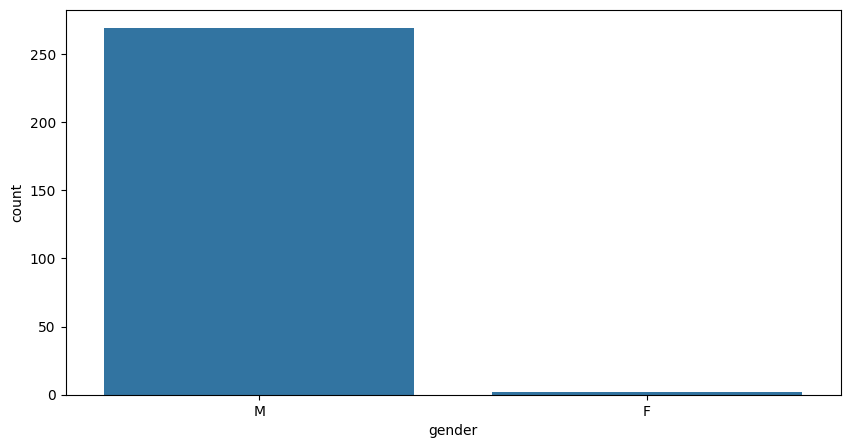

In [254]:
#Género de líderes estados africanxs (1949-2000)
plt.figure(figsize=(10,5))   
sns.countplot(x=df_lideres_africanos_descol["gender"]); 

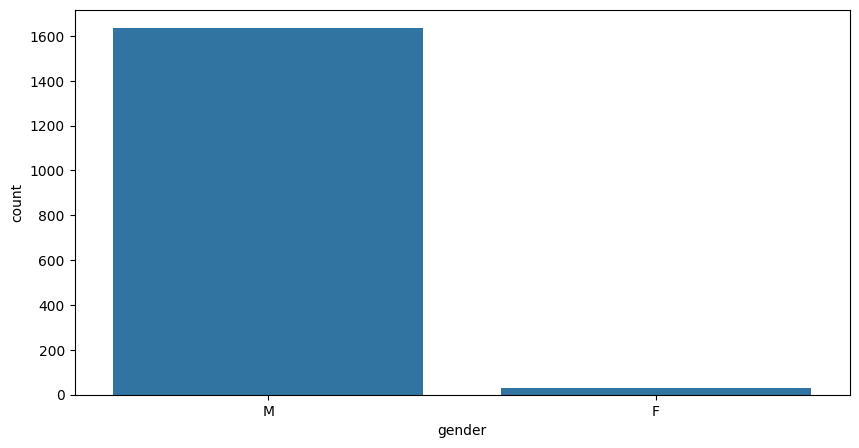

In [255]:
#Género de líderes de todos los estados en el periodo (1949-2000)
plt.figure(figsize=(10,5))   
sns.countplot(x=df_lideres_descol["gender"]); 

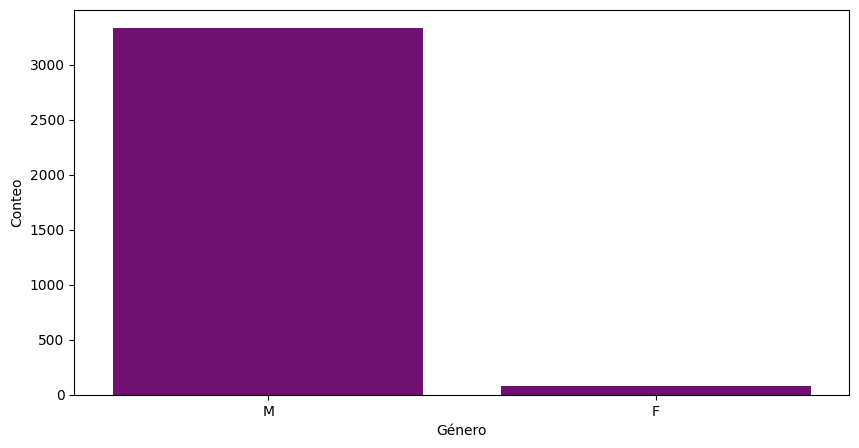

In [322]:
#Género de líderes de todos los estados 
plt.figure(figsize=(10,5))   
sns.countplot(x=df_lideres["gender"], color='purple')
plt.xlabel('Género') 
plt.ylabel('Conteo');

### LAZOS CON LÍDERES

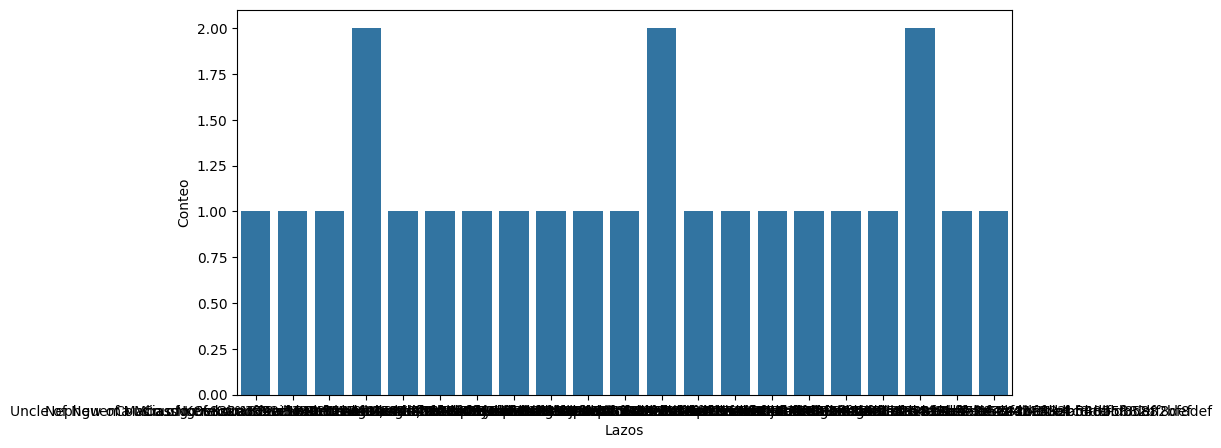

In [326]:
df_filtrado = df_lideres_africanos_postcol[df_lideres_africanos_postcol['fties'] != 'NA']
plt.figure(figsize=(10,5))   
sns.countplot(x=df_filtrado["fties"])
plt.xlabel('Lazos') 
plt.ylabel('Conteo');

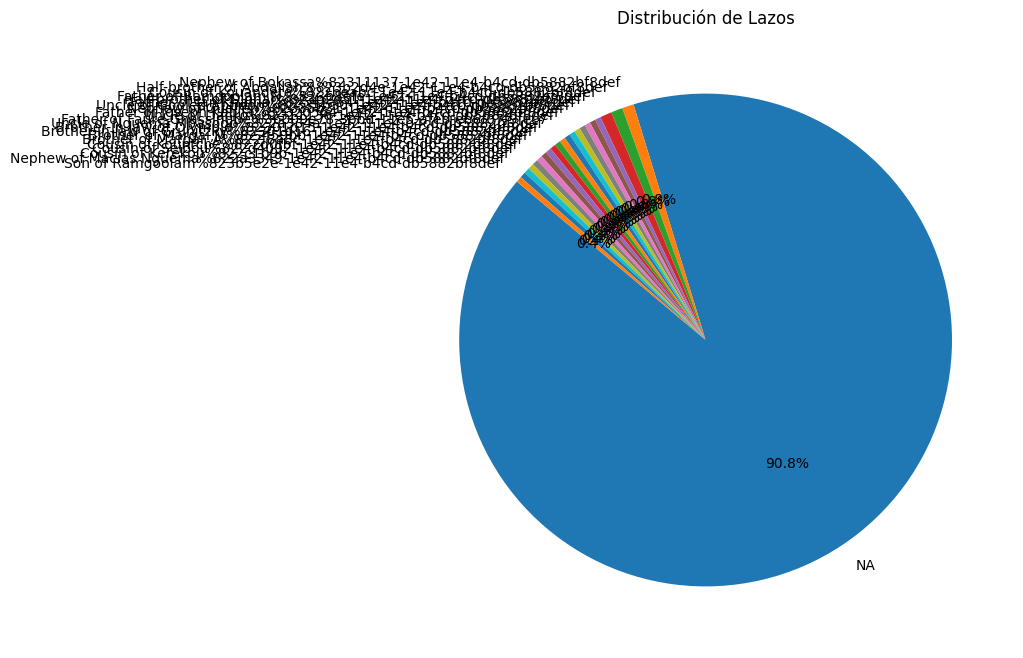

In [323]:
conteo_fties = df_lideres_africanos_postcol['fties'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_fties, labels=conteo_fties.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Lazos')
plt.show()

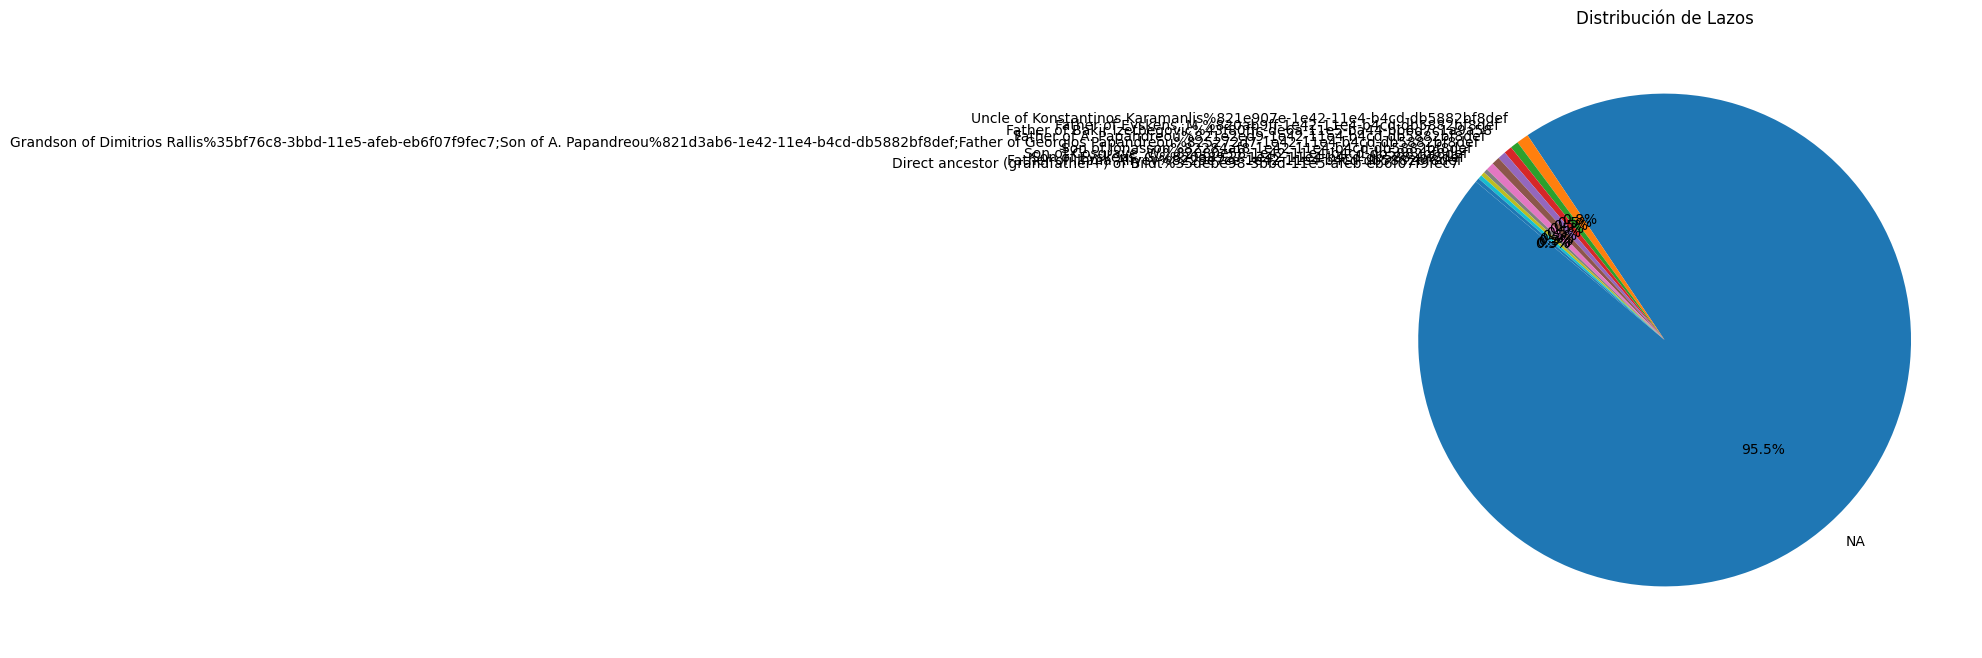

In [324]:
conteo_fties2 = df_lideres_europeos_postcol['fties'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_fties2, labels=conteo_fties2.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Lazos')
plt.show()

### FORMA DE ACCESO AL PODER

In [260]:
#Forma de acceso al poder en líderes mundiales
acceso_global = df_lideres["entry"].value_counts()
acceso_global

entry
Regular               2796
Irregular              571
Foreign Imposition      40
Unknown                  2
Name: count, dtype: int64

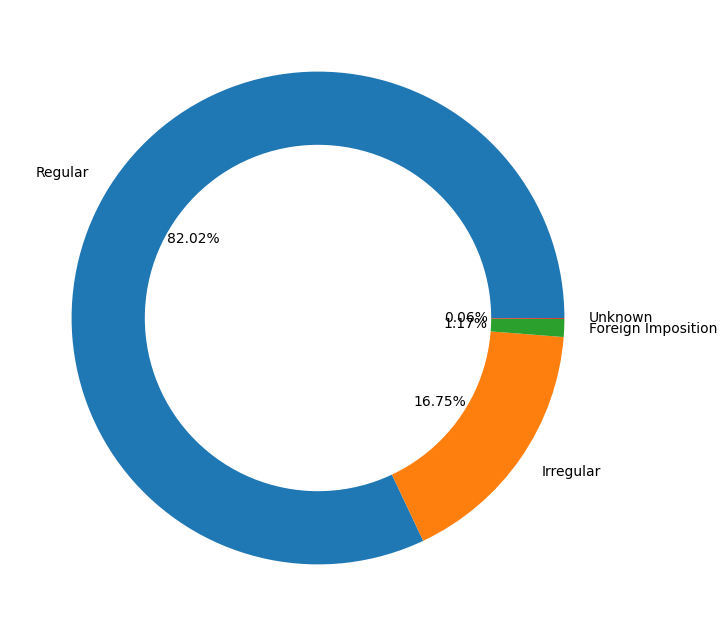

In [327]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_global.values,
        labels=acceso_global.index,
        autopct='%1.2f%%')   
p=plt.gcf()      
p.gca().add_artist(my_circle)  
plt.show()

In [262]:
#Forma de acceso al poder en líderes mundiales (NO AFRICA)
acceso_no_afric = df_lideres_no_africanos["entry"].value_counts()
acceso_no_afric

entry
Regular               2525
Irregular              434
Foreign Imposition      31
Unknown                  2
Name: count, dtype: int64

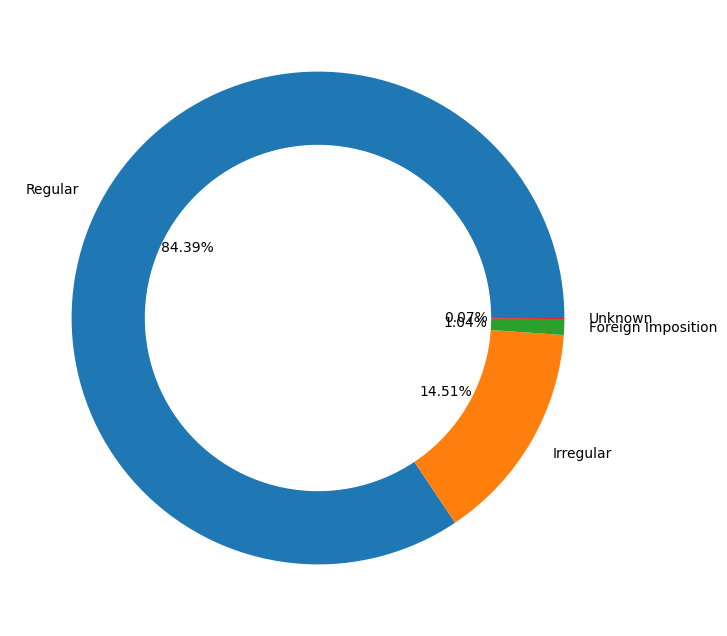

In [263]:
my_circle4=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_no_afric.values,
        labels=acceso_no_afric.index,
        autopct='%1.2f%%')    
p=plt.gcf()      
p.gca().add_artist(my_circle4)   
plt.show()

In [264]:
#Forma de acceso al poder en líderes africanos
acceso_africa = df_lideres_africanos["entry"].value_counts()
acceso_africa

entry
Regular               271
Irregular             137
Foreign Imposition      9
Name: count, dtype: int64

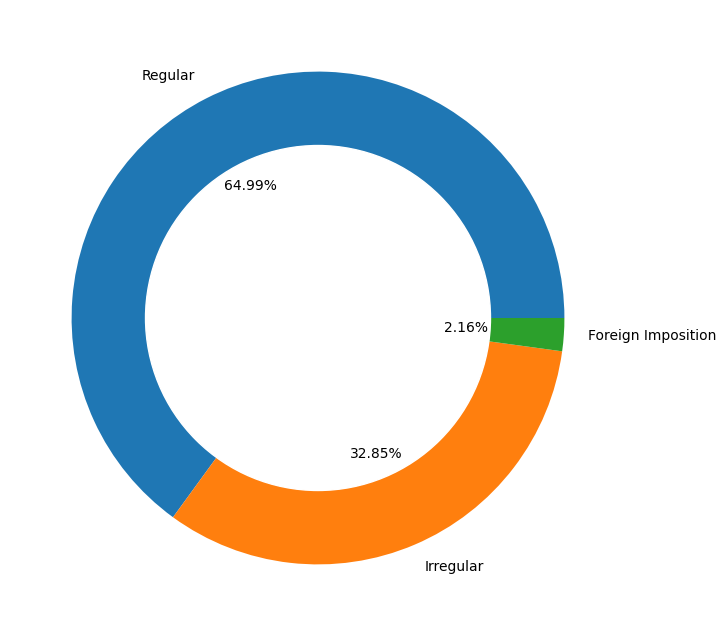

In [265]:
acceso_africa = df_lideres_africanos["entry"].value_counts()
my_circle2=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_africa.values,
        labels=acceso_africa.index,
        autopct='%1.2f%%')    
p2=plt.gcf()     
p2.gca().add_artist(my_circle2)  
plt.show()

Forma de acceso al poder en el periodo analizado

In [266]:
#Forma de acceso al poder en líderes mundiales (descol)
acceso_global_descol = df_lideres_descol["entry"].value_counts()
acceso_global_descol

entry
Regular               1307
Irregular              341
Foreign Imposition      18
Name: count, dtype: int64

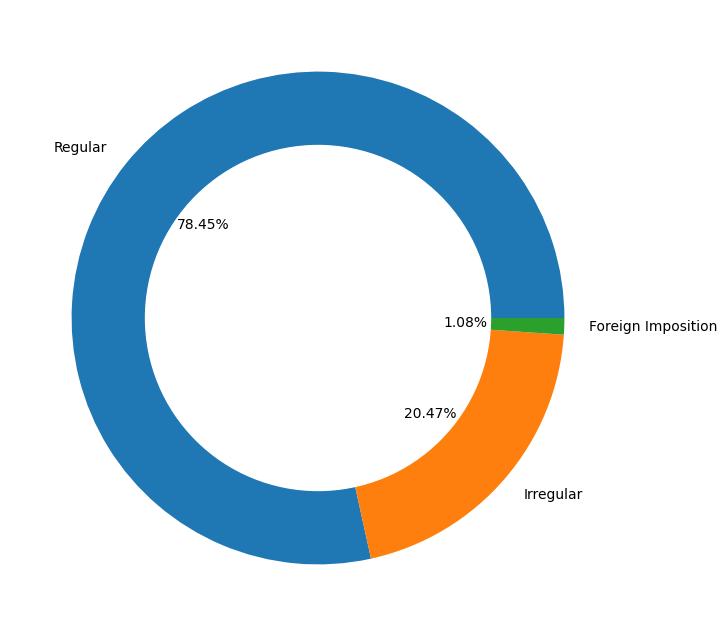

In [267]:
my_circle3=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(8,8))

plt.pie(acceso_global_descol.values,
        labels=acceso_global_descol.index,
        autopct='%1.2f%%')   
p=plt.gcf()      
p.gca().add_artist(my_circle3)   
plt.show()

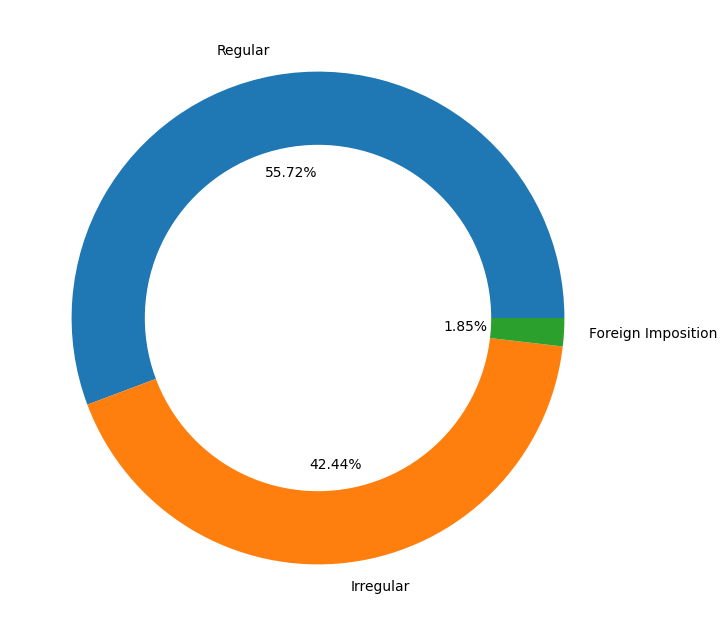

In [268]:
#Forma de acceso al poder en líderes africanos EN EL PERIODO DE DESCOLONIZACION
acceso_africa_descol = df_lideres_africanos_descol["entry"].value_counts()

my_circle4=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_africa_descol.values,
        labels=acceso_africa_descol.index,
        autopct='%1.2f%%')    
p2=plt.gcf()     
p2.gca().add_artist(my_circle4)  
plt.show()

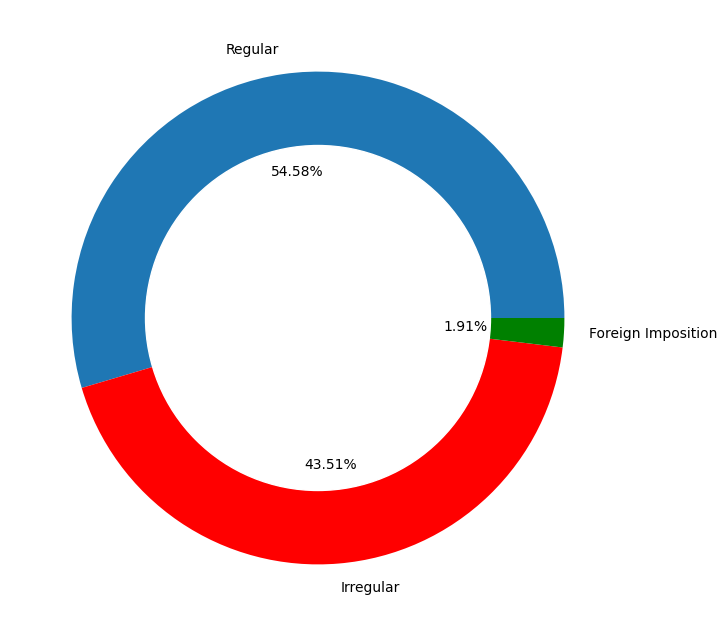

In [269]:
#Forma de acceso al poder en líderes africanos EN EL PERIODO DE POSTCOLONIZACION (60-00)
acceso_africa_postcol = df_lideres_africanos_postcol["entry"].value_counts()

my_circle8=plt.Circle( (0,0), 0.7, color='white')
colors = ['#1f77b4', 'red', 'green', 'purple', 'grey']
plt.figure(figsize=(8,8))
plt.pie(acceso_africa_postcol.values,
        labels=acceso_africa_postcol.index,
        autopct='%1.2f%%',
        colors=colors)    
p2=plt.gcf()     
p2.gca().add_artist(my_circle8)  
plt.show()

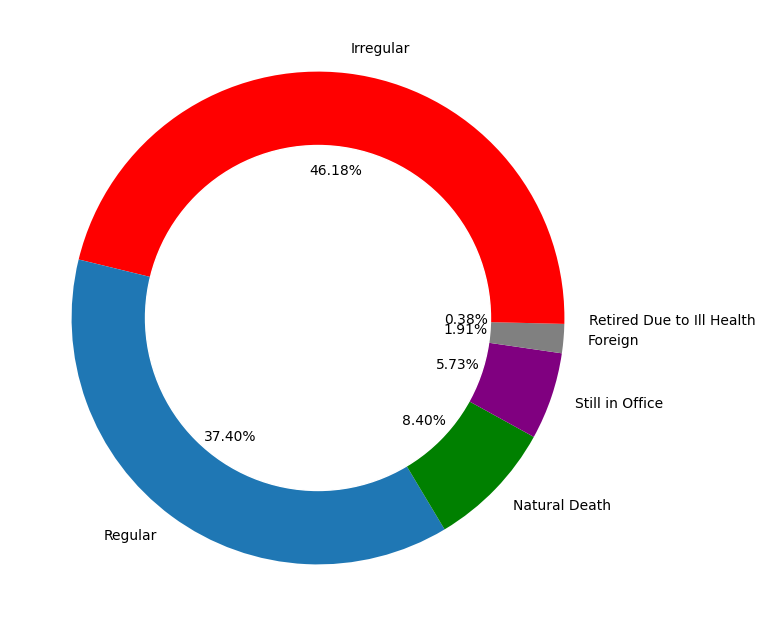

In [270]:
#Forma de SALIDA en líderes africanos EN EL PERIODO DE POSTCOLONIZACION (60-00)
salida_africa_postcol = df_lideres_africanos_postcol["exit"].value_counts()

my_circle10=plt.Circle( (0,0), 0.7, color='white')
colors = ['red', '#1f77b4', 'green', 'purple', 'grey']
plt.figure(figsize=(8,8))
plt.pie(salida_africa_postcol.values,
        labels=salida_africa_postcol.index,
        autopct='%1.2f%%',
        colors=colors)    
p2=plt.gcf()     
p2.gca().add_artist(my_circle10)  
plt.show()

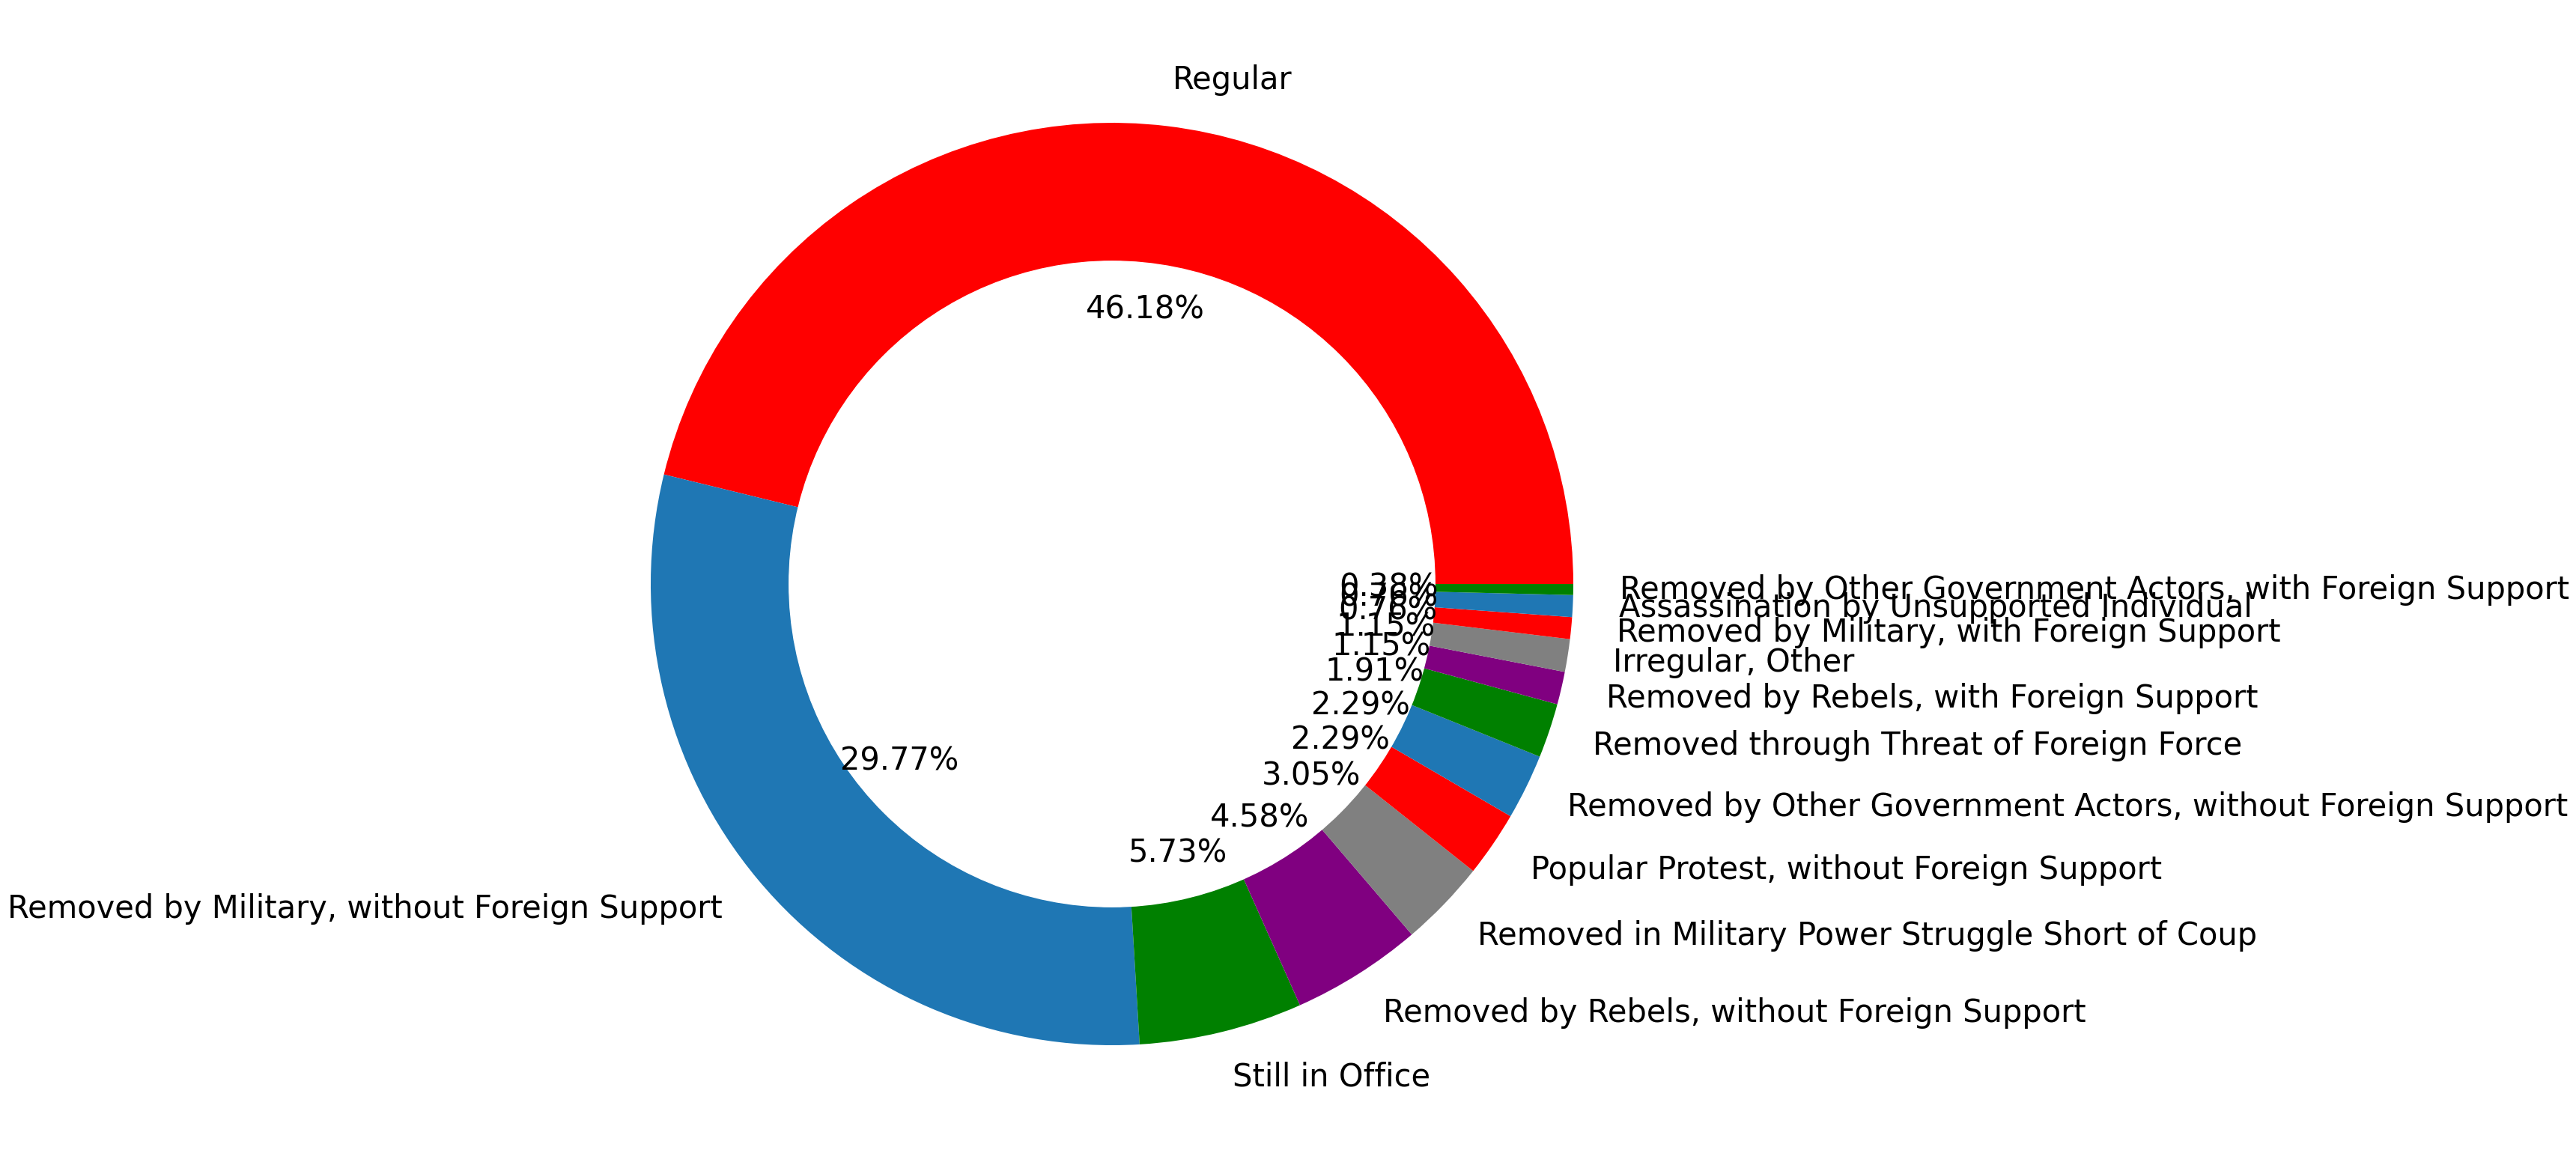

In [271]:
#Forma de SALIDA DETALLADA en líderes africanos EN EL PERIODO DE POSTCOLONIZACION (60-00)
salidadet_africa_postcol = df_lideres_africanos_postcol["exitcode"].value_counts()

my_circle13=plt.Circle( (0,0), 0.7, color='white')
colors = ['red', '#1f77b4', 'green', 'purple', 'grey']
plt.figure(figsize=(20,20))
plt.pie(salidadet_africa_postcol.values,
        labels=salidadet_africa_postcol.index,
        autopct='%1.2f%%',
        colors=colors,
        textprops= {'fontsize': 30})    
p2=plt.gcf()     
p2.gca().add_artist(my_circle13)  
plt.show()

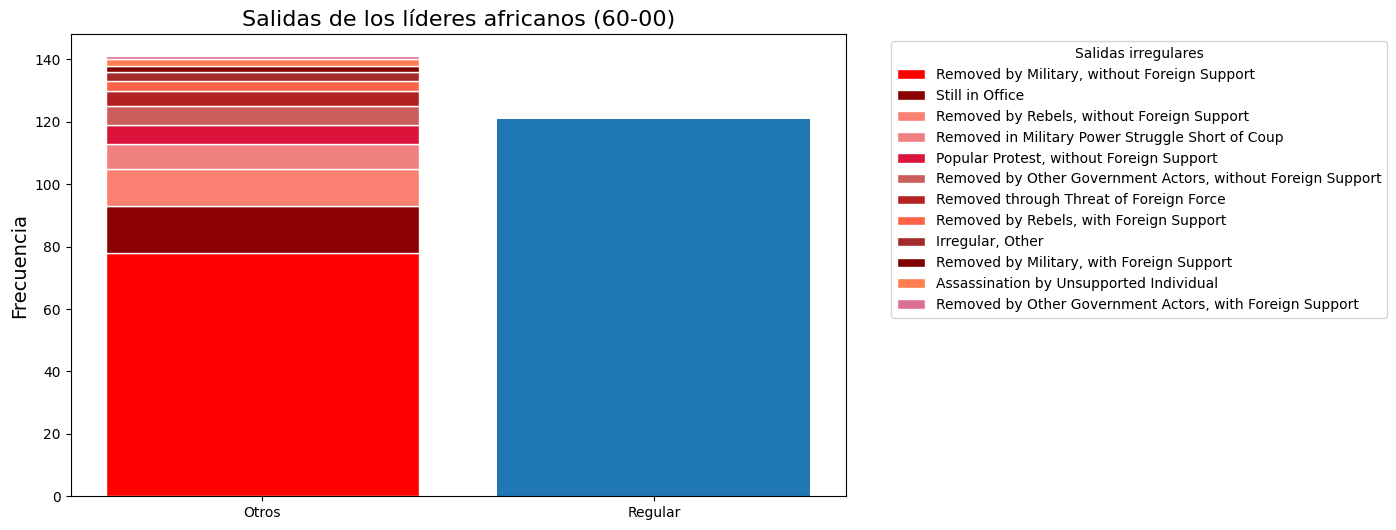

In [328]:
#GRÁFICO BARRAS
otros = salidadet_africa_postcol[salidadet_africa_postcol.index != 'Regular']

categorias = otros.index
valores = otros.values

colors = ['red', 'darkred', 'salmon', 'lightcoral', 'crimson', 'indianred', 'firebrick', 'tomato', 'brown', 'maroon', 'coral', 'palevioletred']

fig, ax = plt.subplots(figsize=(10, 6))
bottom_position = 0
for i, cat in enumerate(categorias):
    ax.bar('Otros', valores[i], bottom=bottom_position, color=colors[i], edgecolor='white', label=cat)
    bottom_position += valores[i]
if 'Regular' in salidadet_africa_postcol:
    ax.bar('Regular', salidadet_africa_postcol['Regular'], color='#1f77b4')

ax.legend(title='Salidas irregulares', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Salidas de los líderes africanos (60-00)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=14)

plt.show()


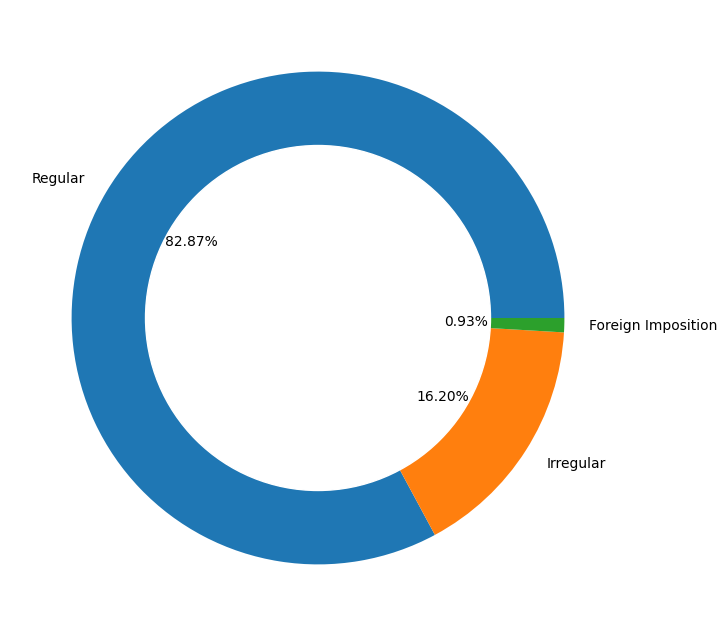

In [273]:
#Forma de acceso al poder en líderes NO africanos EN EL PERIODO DE DESCOLONIZACION
acceso_NOafrica_descol = df_lideres_no_africanos_descol["entry"].value_counts()
my_circle6=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_NOafrica_descol.values,
        labels=acceso_NOafrica_descol.index,
        autopct='%1.2f%%')    
p6=plt.gcf()     
p6.gca().add_artist(my_circle6)  
plt.show()

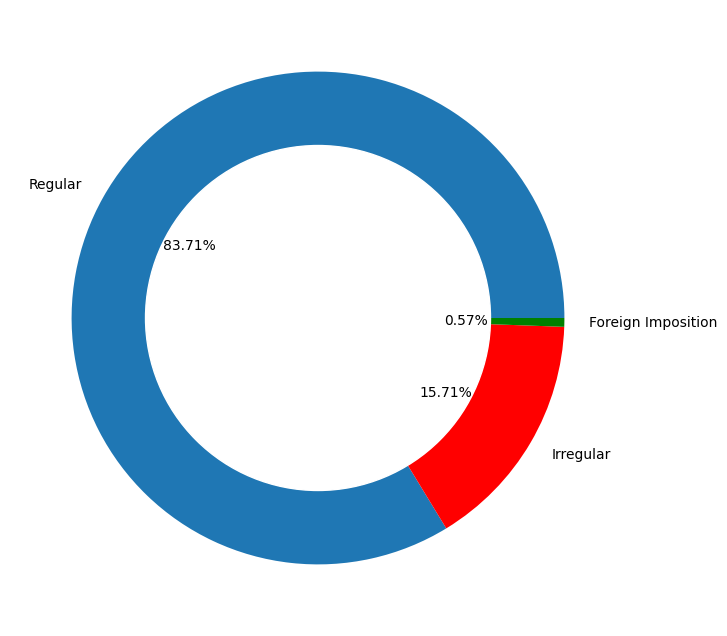

In [274]:
#Forma de acceso al poder en líderes NO africanos EN EL PERIODO DE POSTCOLONIZACION
acceso_NOafrica_postcol = df_lideres_no_africanos_postcol["entry"].value_counts()
colors = ['#1f77b4', 'red', 'green', 'purple', 'grey']
my_circle9=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(acceso_NOafrica_postcol.values,
        labels=acceso_NOafrica_postcol.index,
        autopct='%1.2f%%',
        colors=colors)    
p9=plt.gcf()     
p9.gca().add_artist(my_circle9)  
plt.show()

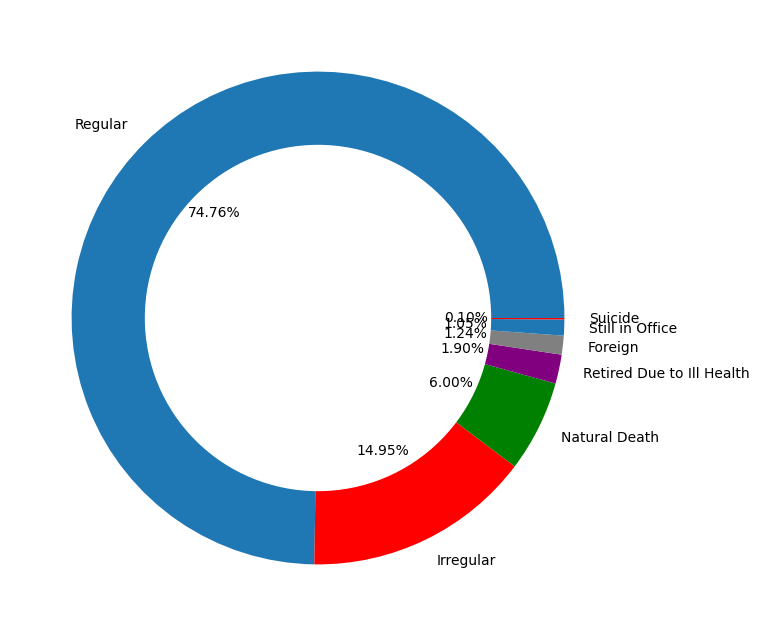

In [275]:
#Forma SALIDA del poder en líderes NO africanos EN EL PERIODO DE POSTCOLONIZACION
salida_NOafrica_postcol = df_lideres_no_africanos_postcol["exit"].value_counts()
colors = ['#1f77b4', 'red', 'green', 'purple', 'grey']
my_circle11=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
plt.pie(salida_NOafrica_postcol.values,
        labels=salida_NOafrica_postcol.index,
        autopct='%1.2f%%',
        colors=colors)    
p9=plt.gcf()     
p9.gca().add_artist(my_circle11)  
plt.show()

In [276]:
total_entries_per_country = df_lideres_postcol.groupby('idacr')['entry'].count()
irregular_entries_per_country = df_lideres_postcol[df_lideres_postcol['entry'] == 'Irregular'].groupby('idacr')['entry'].count()

percentage_irregular = (irregular_entries_per_country / total_entries_per_country * 100).fillna(0)

In [329]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [330]:
ax.set_title('Mapa de Entradas al Poder por País')
plt.show()

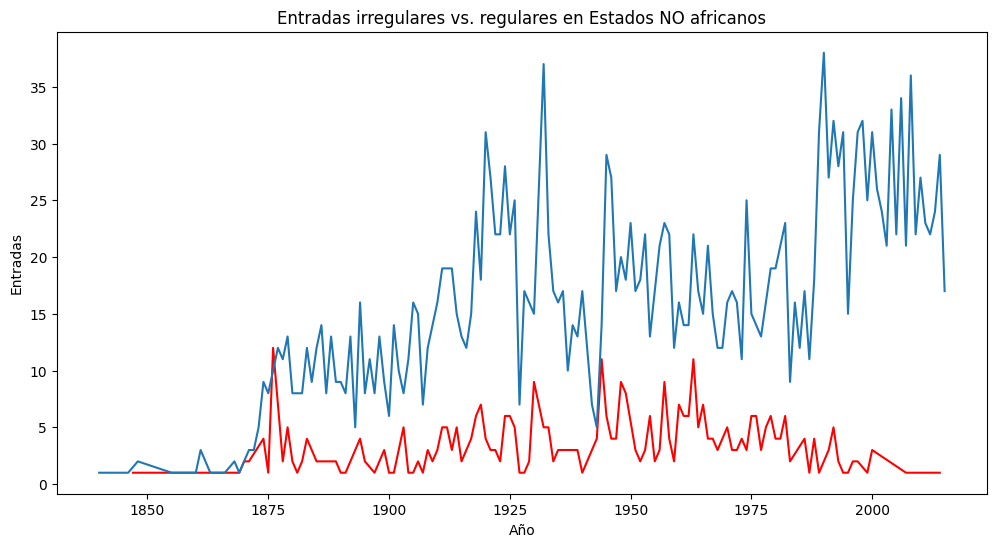

In [331]:
df_lideres_no_africanos['startyear'] = pd.to_datetime(df_lideres_no_africanos['startdate']).dt.year

df_irregular = df_lideres_no_africanos[df_lideres_no_africanos['entry'] == 'Irregular']
irregular_counts = df_irregular.groupby('startyear').size()

df_regular = df_lideres_no_africanos[df_lideres_no_africanos['entry'] == 'Regular']
regular_counts = df_regular.groupby('startyear').size()


plt.figure(figsize=(12, 6))  
irregular_counts.plot(kind='line', color='red', label='Irregular')
regular_counts.plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Entradas irregulares vs. regulares en Estados NO africanos')
plt.xlabel('Año')
plt.ylabel('Entradas')
plt.show()

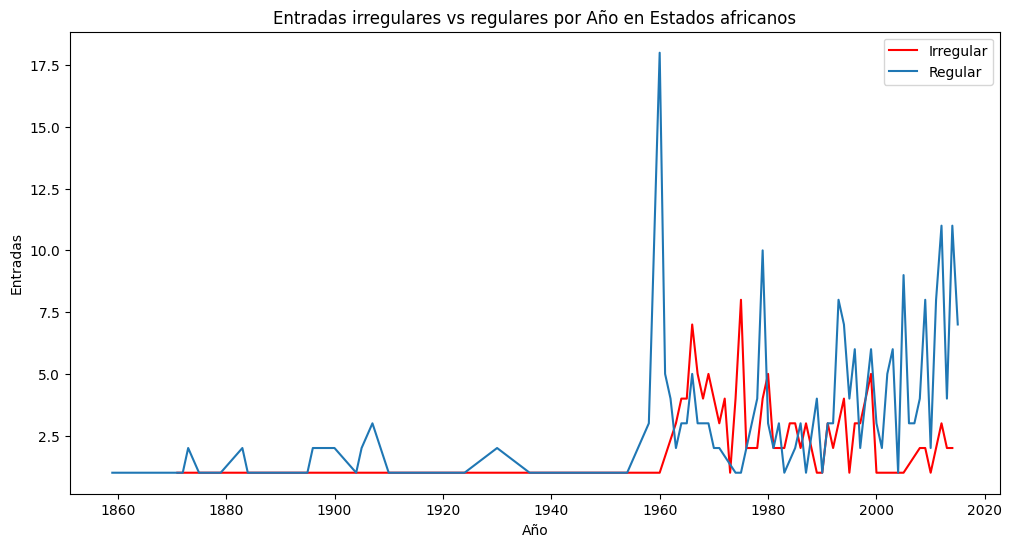

In [332]:
df_lideres_africanos['startyear'] = pd.to_datetime(df_lideres_africanos['startdate']).dt.year

df_irregular = df_lideres_africanos[df_lideres_africanos['entry'] == 'Irregular']
irregular_counts = df_irregular.groupby('startyear').size()

df_regular = df_lideres_africanos[df_lideres_africanos['entry'] == 'Regular']
regular_counts = df_regular.groupby('startyear').size()

plt.figure(figsize=(12, 6))
irregular_counts.plot(kind='line', color='red', label='Irregular')
regular_counts.plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Entradas irregulares vs regulares por Año en Estados africanos')
plt.xlabel('Año')
plt.ylabel('Entradas')
plt.legend()
plt.show()

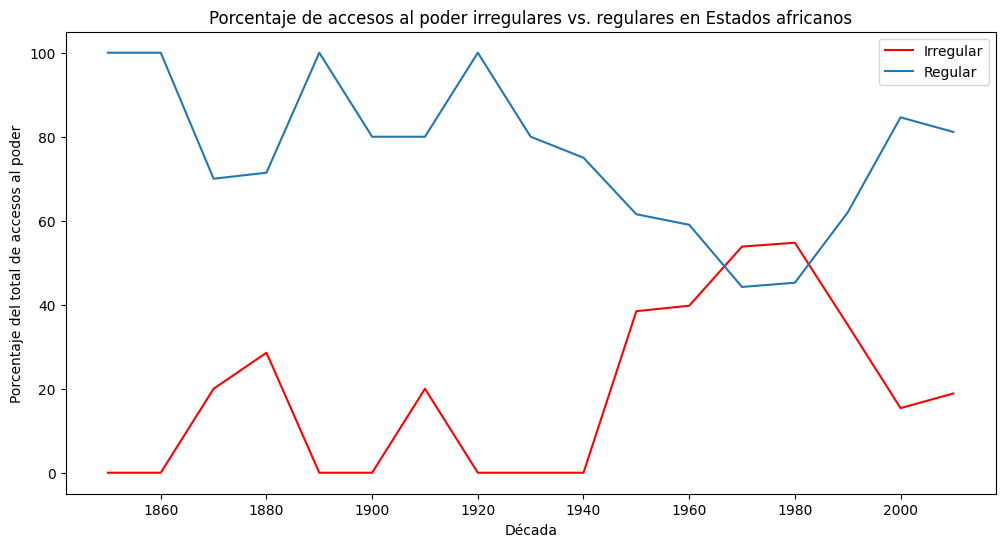

In [282]:
df_lideres_africanos['startyear'] = pd.to_datetime(df_lideres_africanos['startdate']).dt.year
df_lideres_africanos['decade'] = (df_lideres_africanos['startyear'] // 10) * 10
decade_entry_counts = df_lideres_africanos.groupby(['decade', 'entry']).size().unstack(fill_value=0)

total_by_decade = decade_entry_counts.sum(axis=1)
percentage_decade_entry = (decade_entry_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_entry['Irregular'].plot(kind='line', color='red', label='Irregular')
percentage_decade_entry['Regular'].plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Porcentaje de accesos al poder irregulares vs. regulares en Estados africanos')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total de accesos al poder')

plt.legend()
plt.show()

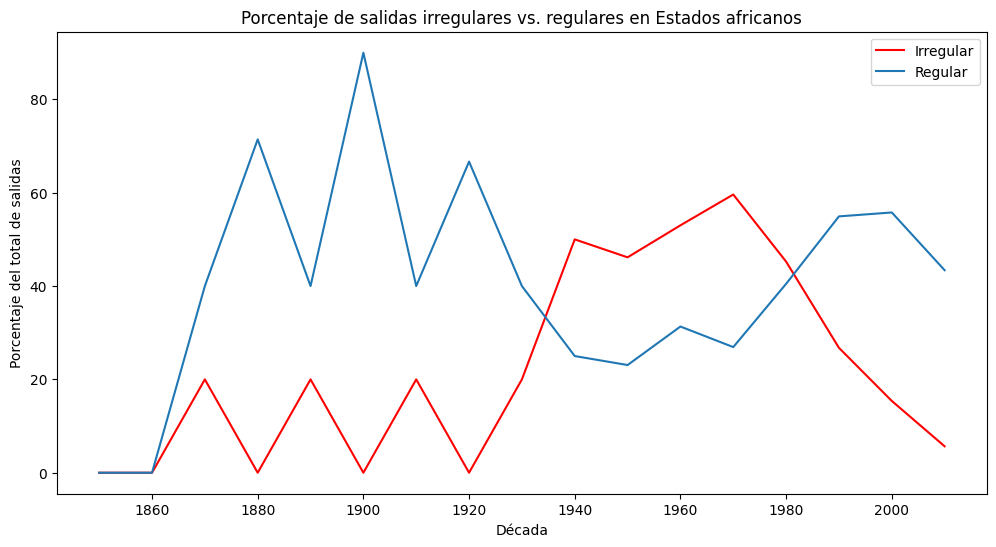

In [283]:
df_lideres_africanos['startyear'] = pd.to_datetime(df_lideres_africanos['startdate']).dt.year
df_lideres_africanos['decade'] = (df_lideres_africanos['startyear'] // 10) * 10
decade_exit_counts = df_lideres_africanos.groupby(['decade', 'exit']).size().unstack(fill_value=0)

total_by_decade = decade_exit_counts.sum(axis=1)
percentage_decade_entry = (decade_exit_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_entry['Irregular'].plot(kind='line', color='red', label='Irregular')
percentage_decade_entry['Regular'].plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Porcentaje de salidas irregulares vs. regulares en Estados africanos')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total de salidas')

plt.legend()
plt.show()

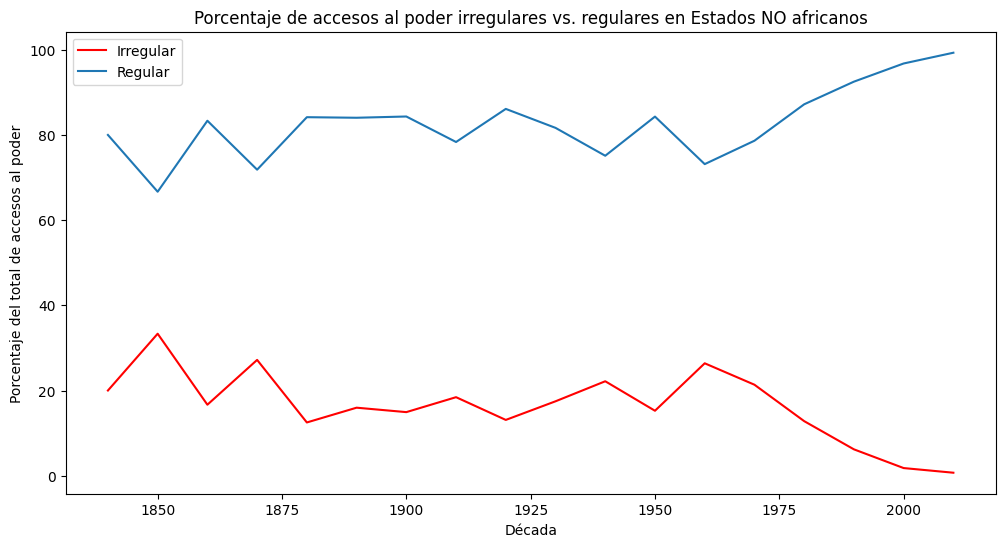

In [284]:
df_lideres_no_africanos['startyear'] = pd.to_datetime(df_lideres_no_africanos['startdate']).dt.year
df_lideres_no_africanos['decade'] = (df_lideres_no_africanos['startyear'] // 10) * 10

decade_entry_counts = df_lideres_no_africanos.groupby(['decade', 'entry']).size().unstack(fill_value=0)
total_by_decade = decade_entry_counts.sum(axis=1)
percentage_decade_entry = (decade_entry_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_entry['Irregular'].plot(kind='line', color='red', label='Irregular')
percentage_decade_entry['Regular'].plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Porcentaje de accesos al poder irregulares vs. regulares en Estados NO africanos')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total de accesos al poder')
plt.legend()
plt.show()

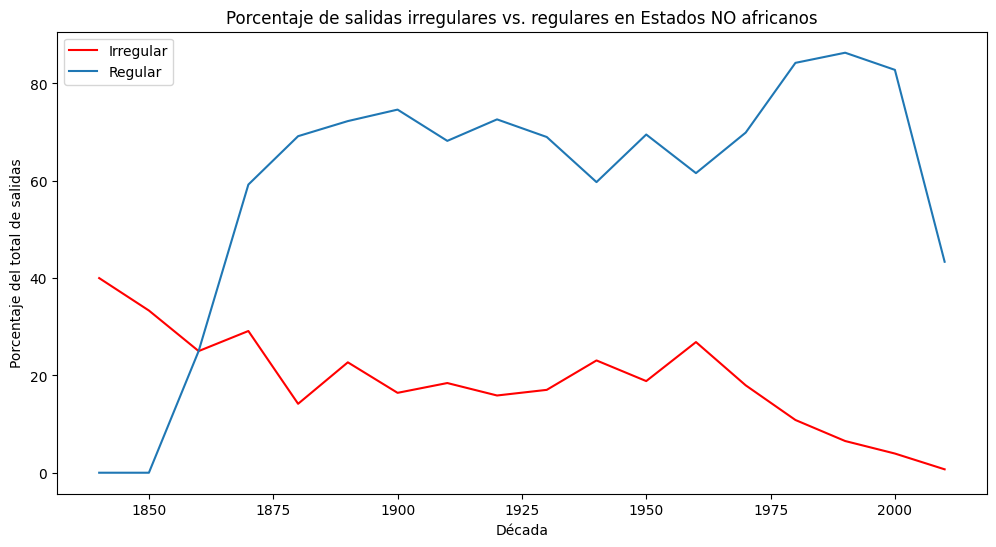

In [285]:
df_lideres_no_africanos['startyear'] = pd.to_datetime(df_lideres_no_africanos['startdate']).dt.year
df_lideres_no_africanos['decade'] = (df_lideres_no_africanos['startyear'] // 10) * 10
decade_exit_counts = df_lideres_no_africanos.groupby(['decade', 'exit']).size().unstack(fill_value=0)

total_by_decade = decade_exit_counts.sum(axis=1)
percentage_decade_entry = (decade_exit_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_entry['Irregular'].plot(kind='line', color='red', label='Irregular')
percentage_decade_entry['Regular'].plot(kind='line', color='#1f77b4', label='Regular')

plt.title('Porcentaje de salidas irregulares vs. regulares en Estados NO africanos')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total de salidas')

plt.legend()
plt.show()

### RELACIÓN CON LÍDERES ANTERIORES

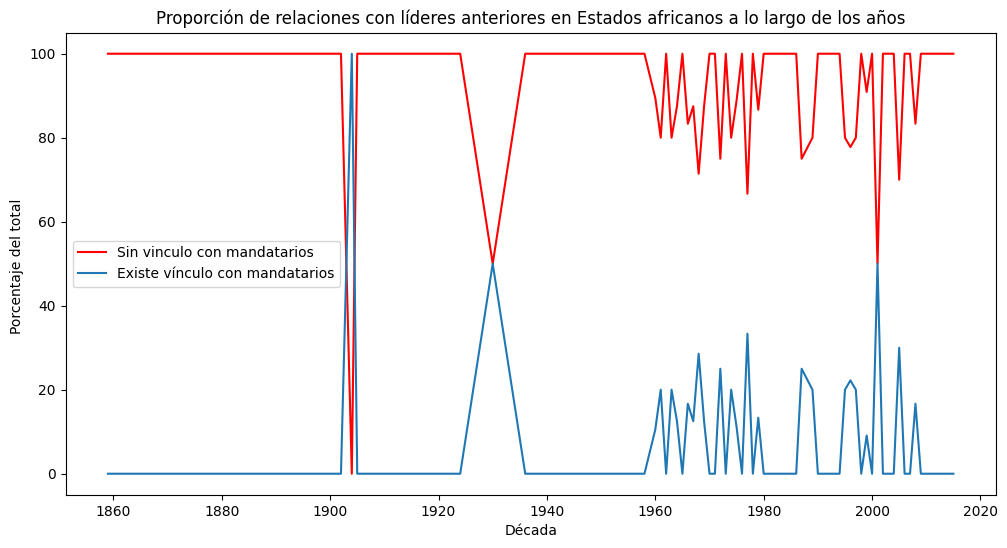

In [286]:
df_lideres_africanos['fties_class'] = df_lideres_africanos['fties'].apply(lambda x: 'NA' if x == 'NA' else 'No NA')

df_lideres_africanos['startyear'] = pd.to_datetime(df_lideres_africanos['startdate']).dt.year
decade_fties_counts = df_lideres_africanos.groupby(['startyear', 'fties_class']).size().unstack(fill_value=0)

total_by_decade = decade_fties_counts.sum(axis=1)
percentage_decade_fties = (decade_fties_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_fties['NA'].plot(kind='line', color='red', label='Sin vinculo con mandatarios')
percentage_decade_fties['No NA'].plot(kind='line', color='#1f77b4', label='Existe vínculo con mandatarios')

plt.title('Proporción de relaciones con líderes anteriores en Estados africanos a lo largo de los años')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total ')

plt.legend()
plt.show()

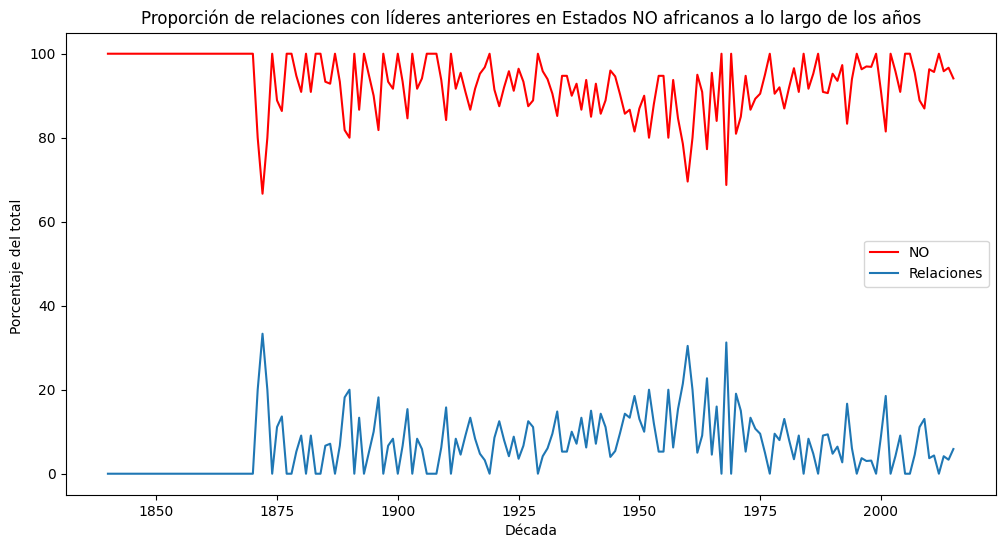

In [287]:
df_lideres_no_africanos['fties_class'] = df_lideres_no_africanos['fties'].apply(lambda x: 'NA' if x == 'NA' else 'No NA')


df_lideres_no_africanos['startyear'] = pd.to_datetime(df_lideres_no_africanos['startdate']).dt.year
decade_fties_counts = df_lideres_no_africanos.groupby(['startyear', 'fties_class']).size().unstack(fill_value=0)

total_by_decade = decade_fties_counts.sum(axis=1)
percentage_decade_fties = (decade_fties_counts.T / total_by_decade).T * 100

plt.figure(figsize=(12, 6))
percentage_decade_fties['NA'].plot(kind='line', color='red', label='NO')
percentage_decade_fties['No NA'].plot(kind='line', color='#1f77b4', label='Relaciones')

plt.title('Proporción de relaciones con líderes anteriores en Estados NO africanos a lo largo de los años')
plt.xlabel('Década')
plt.ylabel('Porcentaje del total ')

plt.legend()
plt.show()

### INTERVENCIÓN EXTRANJERA

In [288]:
df_lideres_africanos['exitcode'].unique()

array(['Removed by Military, without Foreign Support', 'Regular',
       'Still in Office',
       'Removed in Military Power Struggle Short of Coup',
       'Popular Protest, without Foreign Support',
       'Removed by Military, with Foreign Support',
       'Removed by Rebels, without Foreign Support',
       'Removed through Threat of Foreign Force',
       'Removed by Rebels, with Foreign Support',
       'Removed by Other Government Actors, without Foreign Support',
       'Irregular, Other', 'Assassination by Unsupported Individual',
       'Unknown',
       'Removed by Other Government Actors, with Foreign Support'],
      dtype=object)

In [289]:
df_lideres_africanos['posttenurefate'].unique()

array(['Imprisonment', 'Exile', 'OK', 'Death',
       'Missing: Natural Death within Six Months of Losing Office',
       'Missing: No Information Found', 'Leader Still in Office',
       'Missing: Left Office after 2014-12-31'], dtype=object)

### POST MANDATO

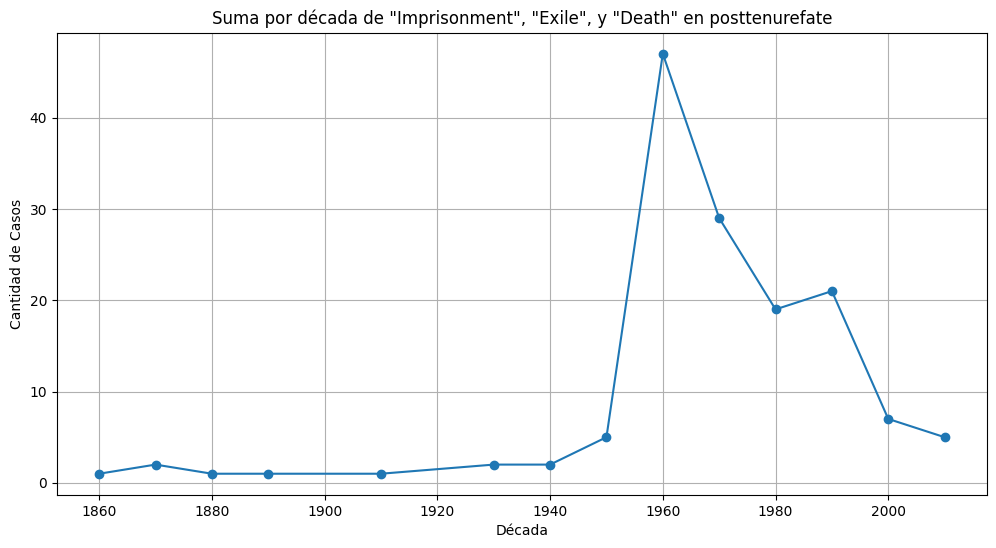

In [333]:
post_mandato = df_lideres_africanos['posttenurefate'].isin(['Imprisonment', 'Exile', 'Death'])
df_postmandato_africanos = df_lideres_africanos[post_mandato]
df_postmandato_africanos['decade'] = (df_postmandato_africanos['startyear'] // 10) * 10
conteo_por_decada = df_postmandato_africanos.groupby('decade')['posttenurefate'].count()

plt.figure(figsize=(12, 6))
conteo_por_decada.plot(kind='line', marker='o')
plt.title('Suma por década de "Imprisonment", "Exile", y "Death" en posttenurefate')
plt.xlabel('Década')
plt.ylabel('Cantidad de Casos')
plt.grid(True)
plt.show()

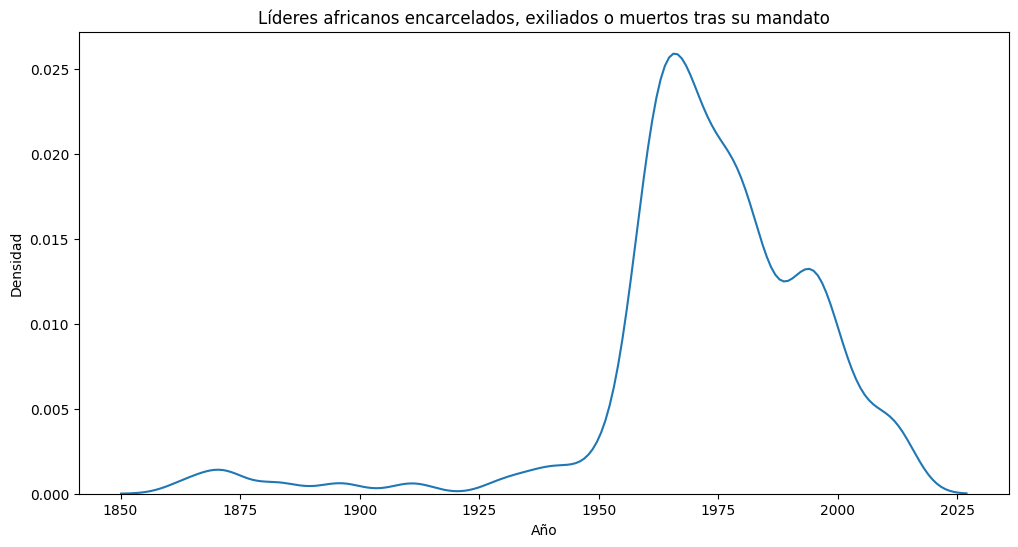

In [291]:
#densidad
df_postmandato_africanos['startyear'] = pd.to_numeric(df_postmandato_africanos['startyear'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.kdeplot(df_postmandato_africanos['startyear'], bw_adjust=0.5)

plt.title('Líderes africanos encarcelados, exiliados o muertos tras su mandato')
plt.xlabel('Año')
plt.ylabel('Densidad')
plt.show()

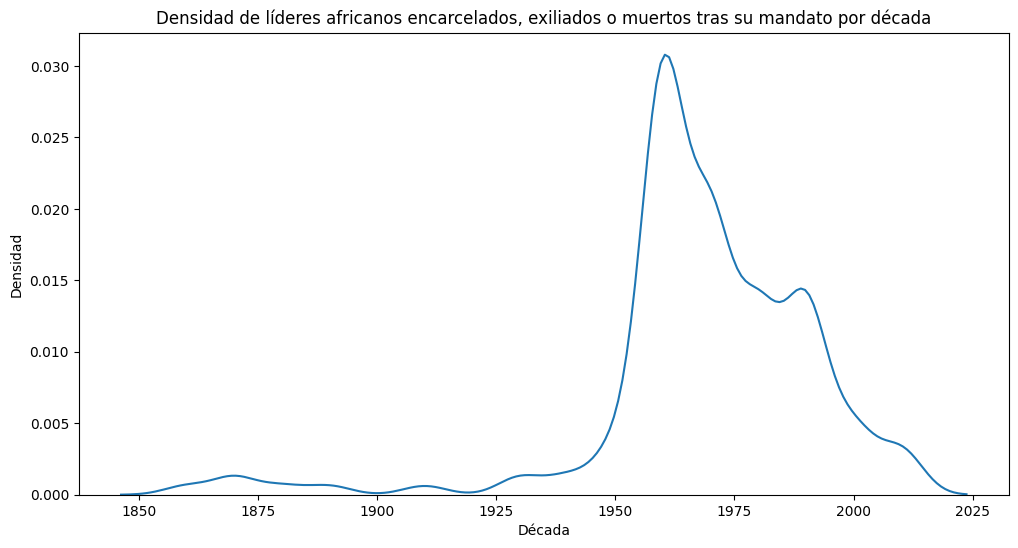

In [292]:
# Densidad por década
plt.figure(figsize=(12, 6))
sns.kdeplot(df_postmandato_africanos['decade'], bw_adjust=0.5)

plt.title('Densidad de líderes africanos encarcelados, exiliados o muertos tras su mandato por década')
plt.xlabel('Década')
plt.ylabel('Densidad')
plt.show()

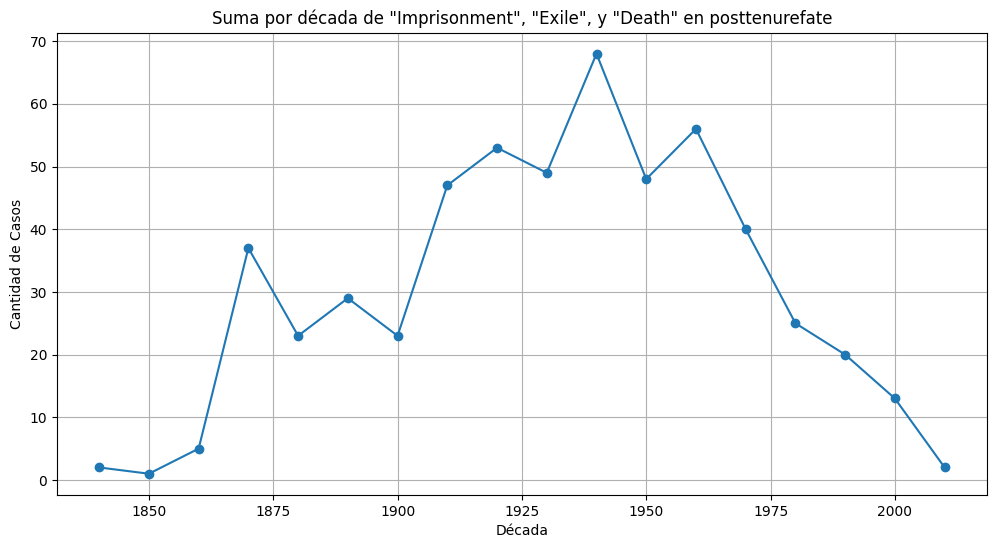

In [293]:
post_mandato2 = df_lideres_no_africanos['posttenurefate'].isin(['Imprisonment', 'Exile', 'Death'])
df_postmandato_noafricanos = df_lideres_no_africanos[post_mandato2]
df_postmandato_noafricanos['decade'] = (df_postmandato_noafricanos['startyear'] // 10) * 10
conteo_por_decada2 = df_postmandato_noafricanos.groupby('decade')['posttenurefate'].count()

plt.figure(figsize=(12, 6))
conteo_por_decada2.plot(kind='line', marker='o')

plt.title('Suma por década de "Imprisonment", "Exile", y "Death" en posttenurefate')
plt.xlabel('Década')
plt.ylabel('Cantidad de Casos')
plt.grid(True)
plt.show()

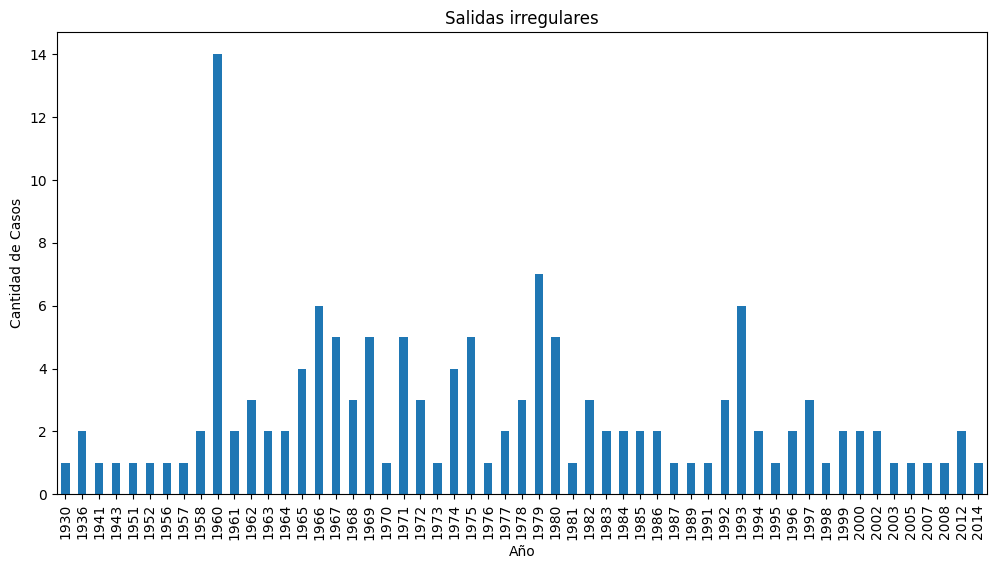

In [294]:
post_mandato3 = df_lideres_africanos['exitcode'].isin(['Removed by Military, without Foreign Support',
       'Removed in Military Power Struggle Short of Coup',
       'Popular Protest, without Foreign Support',
       'Removed by Military, with Foreign Support',
       'Removed by Rebels, without Foreign Support',
       'Removed through Threat of Foreign Force',
       'Removed by Rebels, with Foreign Support',
       'Removed by Other Government Actors, without Foreign Support',
       'Irregular, Other', 'Assassination by Unsupported Individual',
       'Removed by Other Government Actors, with Foreign Support'])
df_golpes_africanos = df_lideres_africanos[post_mandato3]

conteo_anual = df_golpes_africanos.groupby('startyear')['exitcode'].count()

plt.figure(figsize=(12, 6))
conteo_anual.plot(kind='bar')

plt.title('Salidas irregulares')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.show()

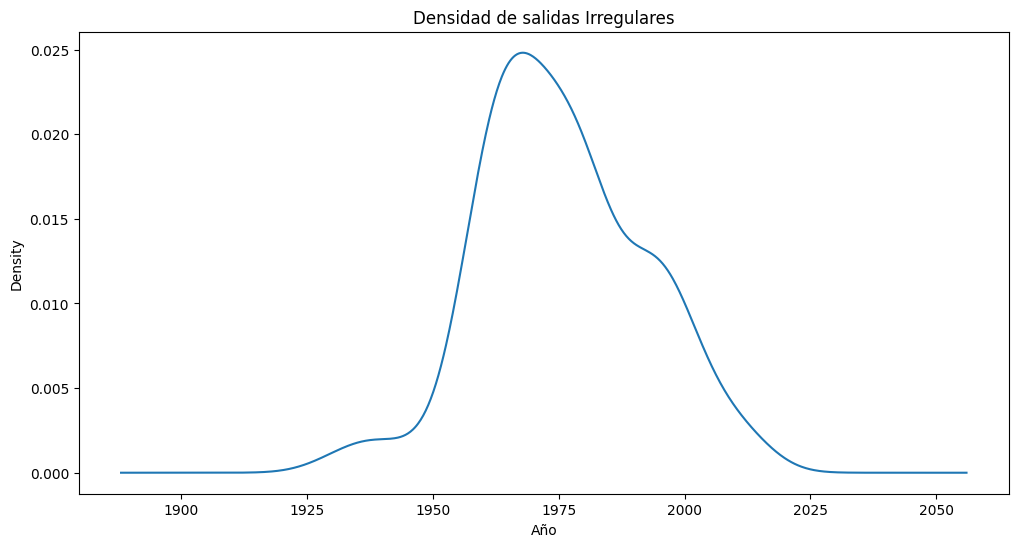

In [295]:
#densidad
plt.figure(figsize=(12, 6))
df_golpes_africanos['startyear'].plot(kind='kde')
plt.title('Densidad de salidas Irregulares')
plt.xlabel('Año')
plt.show()

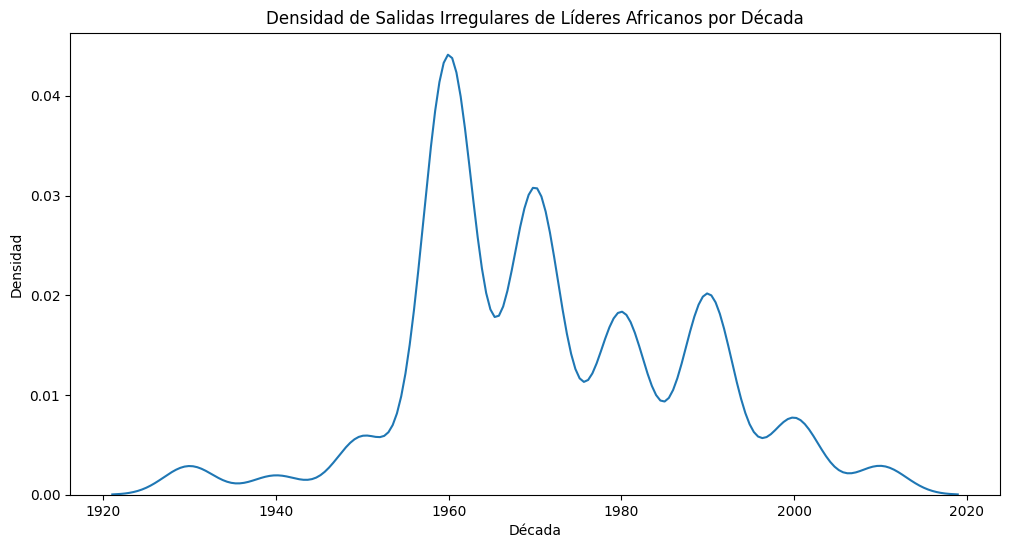

In [296]:
df_golpes_africanos['decade'] = (df_golpes_africanos['startyear'] // 10) * 10
plt.figure(figsize=(12, 6))
sns.kdeplot(df_golpes_africanos['decade'], bw_adjust=0.5)

plt.title('Densidad de Salidas Irregulares de Líderes Africanos por Década')
plt.xlabel('Década')
plt.ylabel('Densidad')
plt.show()

In [297]:
df_lideres_africanos['exitcode'].unique()

array(['Removed by Military, without Foreign Support', 'Regular',
       'Still in Office',
       'Removed in Military Power Struggle Short of Coup',
       'Popular Protest, without Foreign Support',
       'Removed by Military, with Foreign Support',
       'Removed by Rebels, without Foreign Support',
       'Removed through Threat of Foreign Force',
       'Removed by Rebels, with Foreign Support',
       'Removed by Other Government Actors, without Foreign Support',
       'Irregular, Other', 'Assassination by Unsupported Individual',
       'Unknown',
       'Removed by Other Government Actors, with Foreign Support'],
      dtype=object)

### DURACIÓN DE MANDATOS

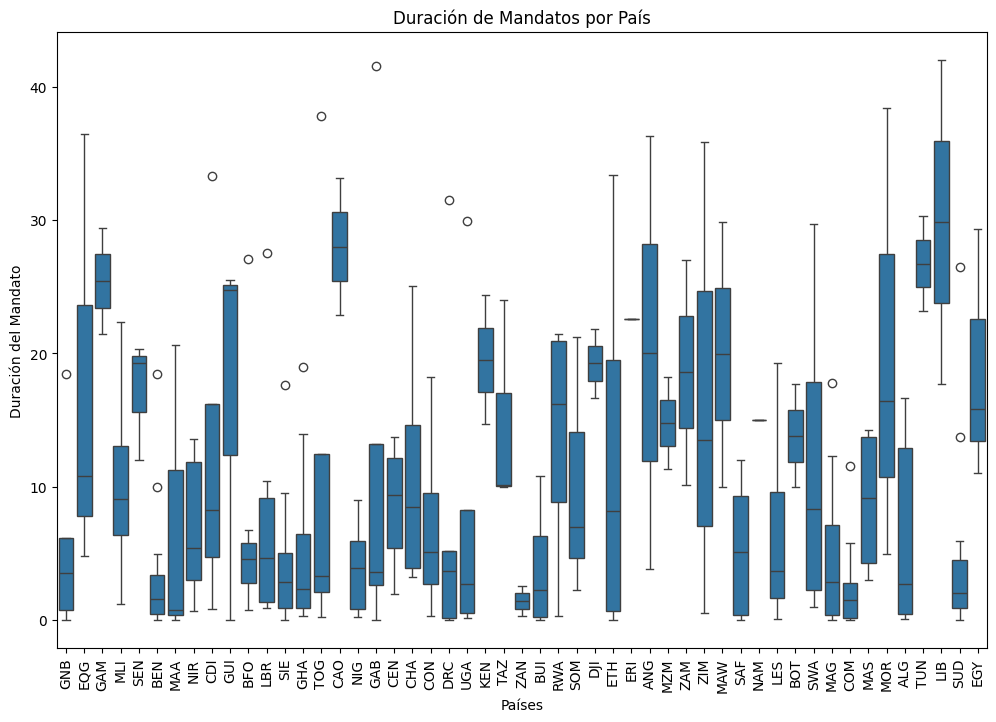

In [298]:
#Duración de los mandatos en postcolonización en estados africanos
plt.figure(figsize=(12, 8))  
sns.boxplot(x='idacr', y='term_lenght', data=df_lideres_africanos_postcol)

plt.xticks(rotation=90) 
plt.xlabel('Países')
plt.ylabel('Duración del Mandato')
plt.title('Duración de Mandatos por País')
plt.show()

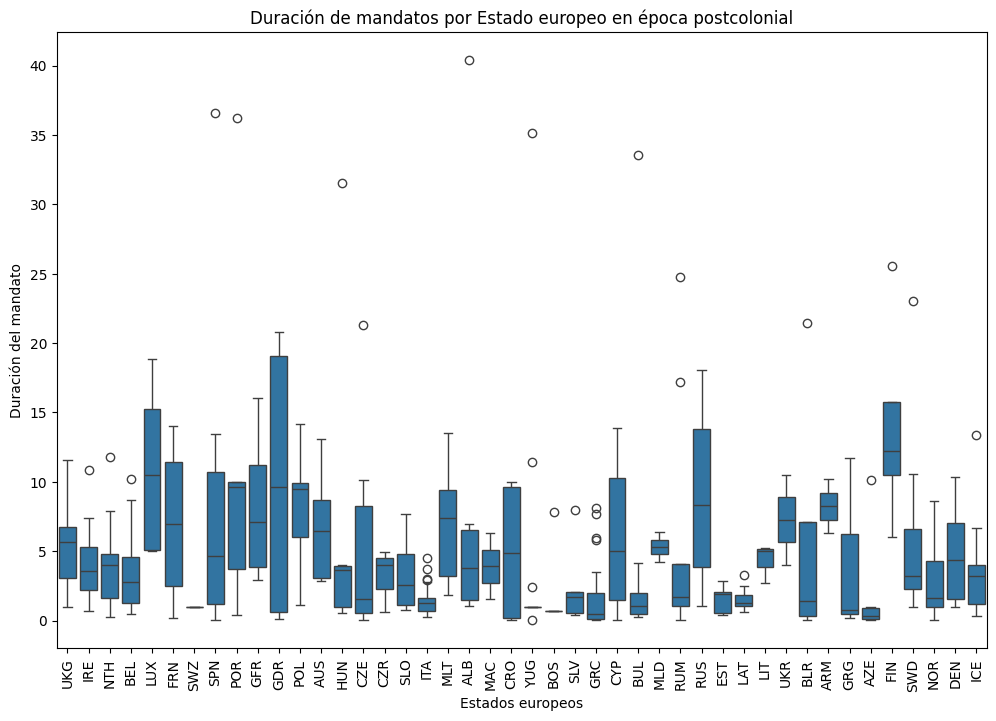

In [299]:
#Duración de los mandatos en postcolonización en estados EUROPEOS
plt.figure(figsize=(12, 8))  
sns.boxplot(x='idacr', y='term_lenght', data=df_lideres_europeos_postcol)

plt.xticks(rotation=90) 
plt.xlabel('Estados europeos')
plt.ylabel('Duración del mandato')
plt.title('Duración de mandatos por Estado europeo en época postcolonial')
plt.show()

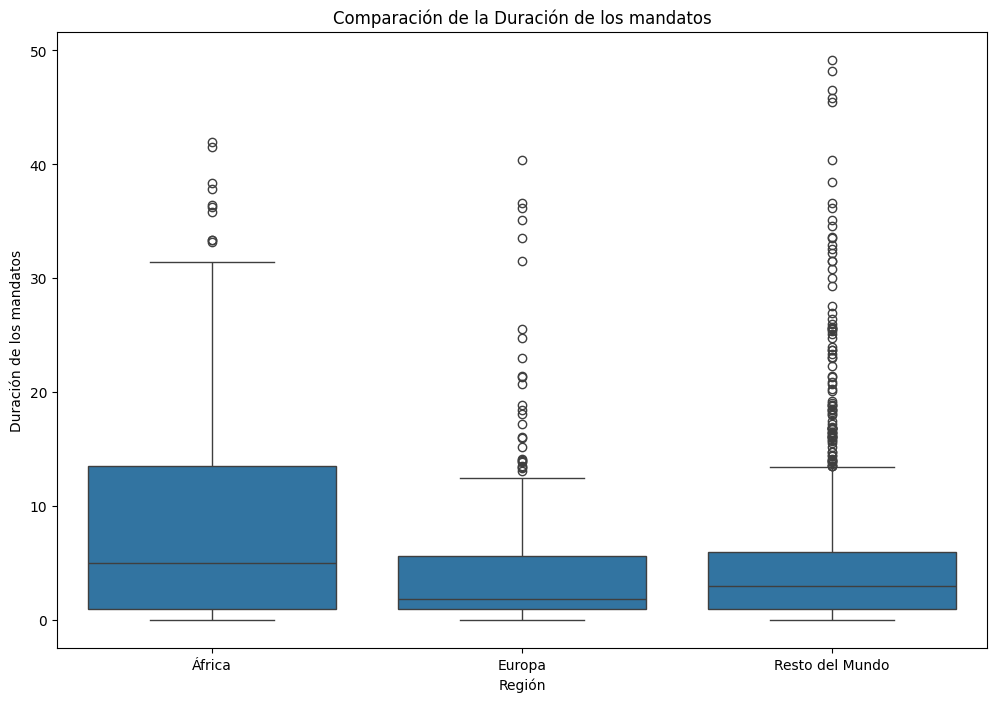

In [334]:
df_lideres_africanos_postcol['region'] = 'África'
df_lideres_europeos_postcol['region'] = 'Europa'
df_lideres_no_africanos_postcol['region'] = 'Resto del Mundo'

df_combined = pd.concat([df_lideres_africanos_postcol, df_lideres_europeos_postcol, df_lideres_no_africanos_postcol])
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='term_lenght', data=df_combined)

plt.xlabel('Región')
plt.ylabel('Duración de los mandatos')
plt.title('Comparación de la Duración de los mandatos')
plt.show()

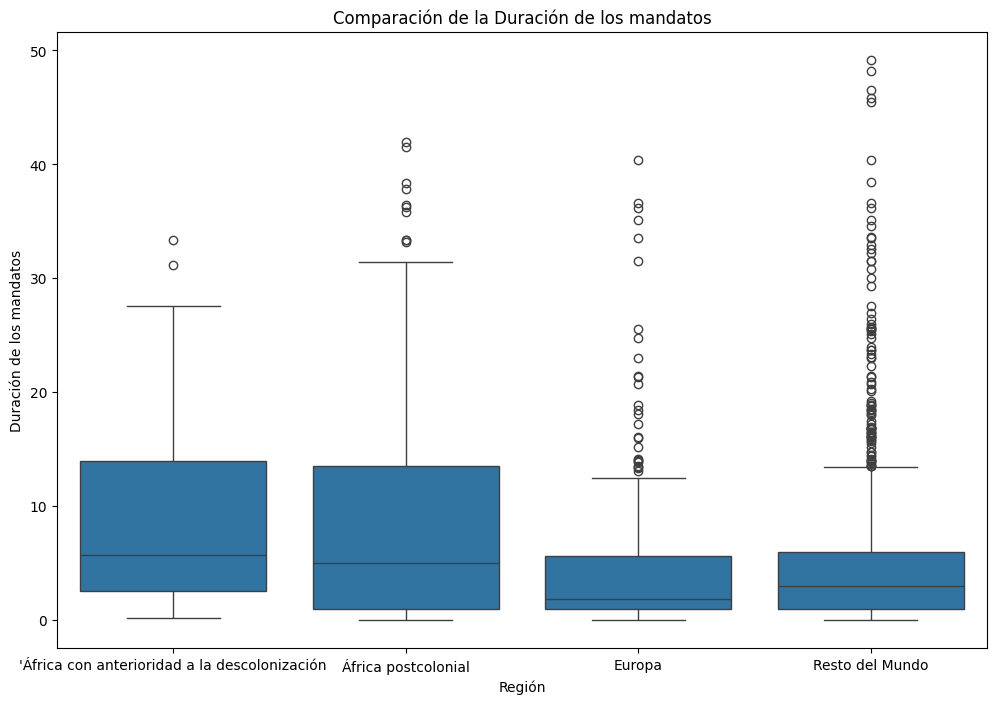

In [301]:
df_lideres_africanos_PREdescol['region'] = "'África con anterioridad a la descolonización"
df_lideres_africanos_postcol['region'] = 'África postcolonial'
df_lideres_europeos_postcol['region'] = 'Europa'
df_lideres_no_africanos_postcol['region'] = 'Resto del Mundo'

df_combined = pd.concat([df_lideres_africanos_PREdescol, df_lideres_africanos_postcol, df_lideres_europeos_postcol, df_lideres_no_africanos_postcol])
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='term_lenght', data=df_combined)

plt.xlabel('Región')
plt.ylabel('Duración de los mandatos')
plt.title('Comparación de la Duración de los mandatos')
plt.show()

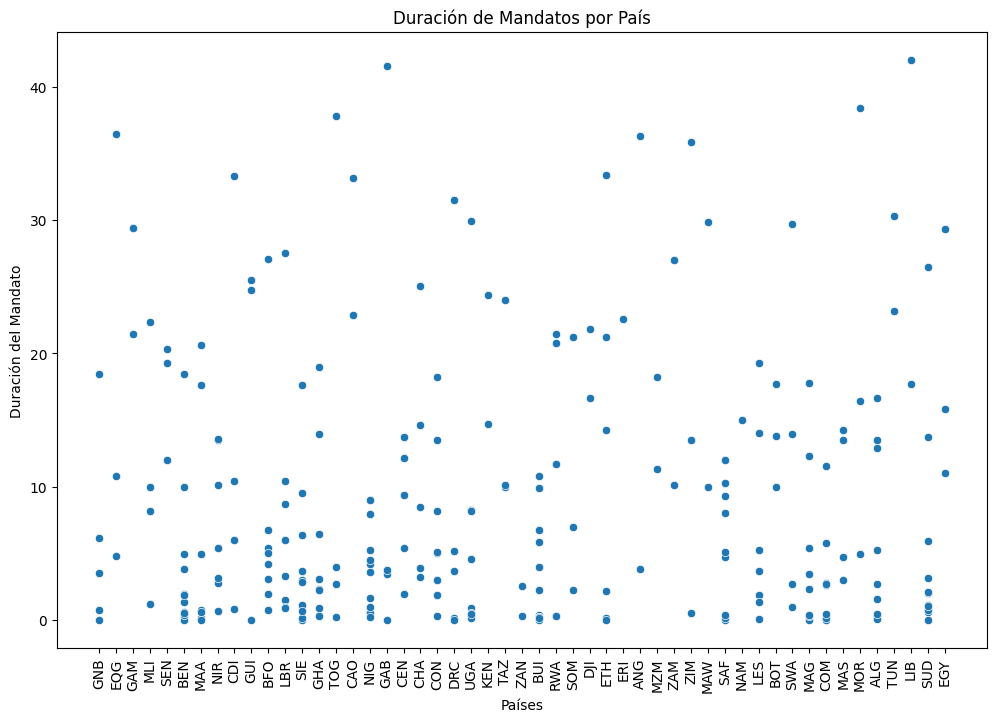

In [335]:
plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='idacr', y='term_lenght', data=df_lideres_africanos_postcol)

plt.xticks(rotation=90)  
plt.xlabel('Países')
plt.ylabel('Duración del Mandato')
plt.title('Duración de Mandatos por País')
plt.show()

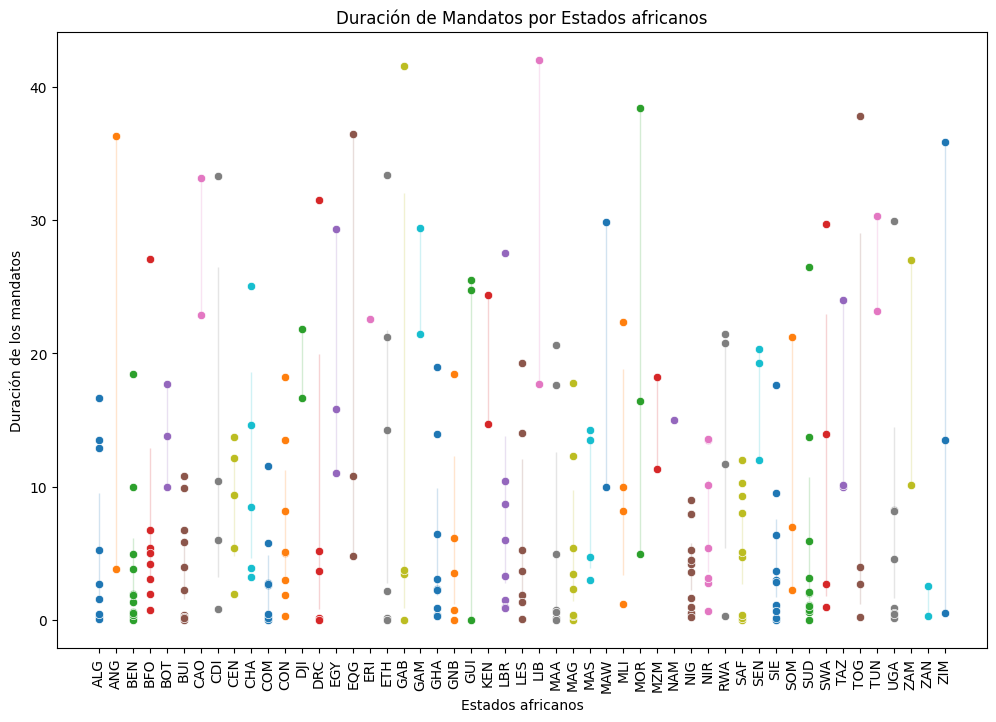

In [303]:
plt.figure(figsize=(12, 8))
grupos = df_lideres_africanos_postcol.groupby('idacr')

for nombre, grupo in grupos:
    sns.scatterplot(x=grupo['idacr'], y=grupo['term_lenght'])
    sns.lineplot(x=grupo['idacr'], y=grupo['term_lenght'], sort=False)

plt.xticks(rotation=90)
plt.xlabel('Estados africanos')
plt.ylabel('Duración de los mandatos')
plt.title('Duración de Mandatos por Estados africanos')
plt.show()

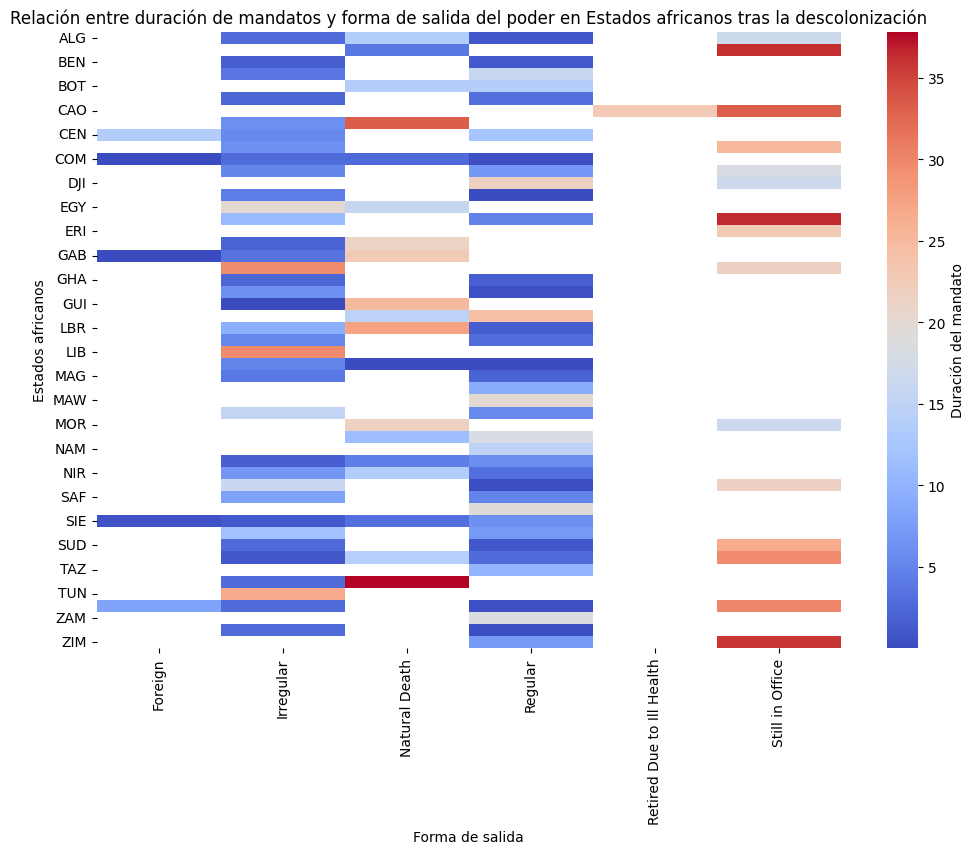

In [304]:
#RELACIÓN FORMA SALIDA DEL PODER/DURACIÓN MANDATO EN PERIODO  POSTCOL PAÍSES AFRICANOS
pivot_table = df_lideres_africanos_postcol.pivot_table(values='term_lenght', index='idacr', columns='exit', aggfunc='median')
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=False, cmap='coolwarm')
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Duración del mandato')

plt.xlabel('Forma de salida')
plt.ylabel('Estados africanos')
plt.title('Relación entre duración de mandatos y forma de salida del poder en Estados africanos tras la descolonización')
plt.show()

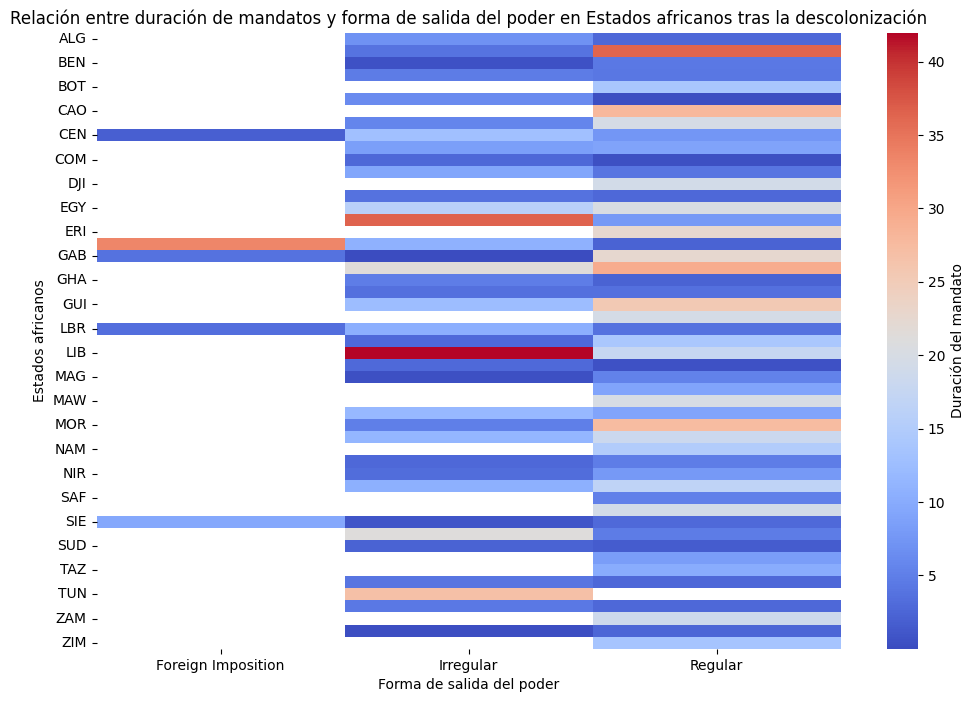

In [336]:
#RELACIÓN FORMA ACCESO AL PODER/DURACIÓN MANDATO EN PERIODO  POSTCOL PAÍSES AFRICANOS
pivot_table = df_lideres_africanos_postcol.pivot_table(values='term_lenght', index='idacr', columns='entry', aggfunc='median')
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=False, cmap='coolwarm')
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Duración del mandato')

plt.xlabel('Forma de salida del poder')
plt.ylabel('Estados africanos')
plt.title('Relación entre duración de mandatos y forma de salida del poder en Estados africanos tras la descolonización')
plt.show()

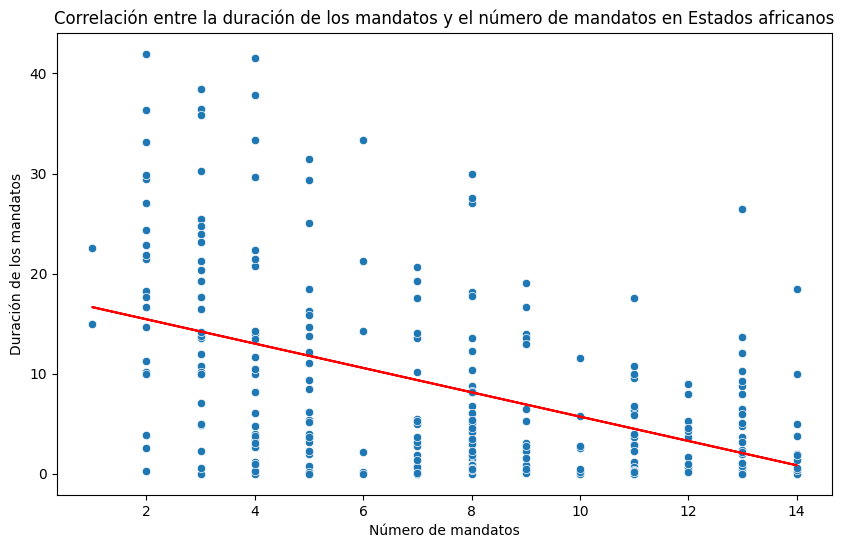

In [306]:
#RELACIÓN ENTRE NÚMERO DE MANDATOS Y SU DURACIÓN  
num_mandatos = df_lideres_africanos_descol.groupby('idacr').size().reset_index(name='num_mandatos')
df_con_num_mandatos = df_lideres_africanos_descol.merge(num_mandatos, on='idacr')
x = df_con_num_mandatos['num_mandatos']
y = df_con_num_mandatos['term_lenght'] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, color='red')  
plt.xlabel('Número de mandatos')
plt.ylabel('Duración de los mandatos')
plt.title('Correlación entre la duración de los mandatos y el número de mandatos en Estados africanos')
plt.show()

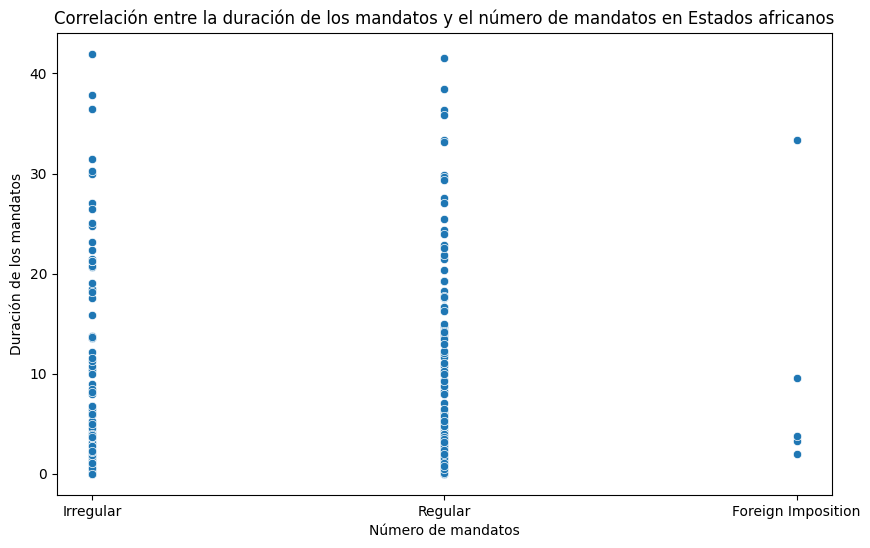

In [307]:
#RELACIÓN ENTRE FORMA DE ENTRADA Y DURACIÓN DE LOS MANDATOS
x = df_lideres_africanos_descol['entry']
y = df_lideres_africanos_descol['term_lenght'] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)

plt.xlabel('Número de mandatos')
plt.ylabel('Duración de los mandatos')
plt.title('Correlación entre la duración de los mandatos y el número de mandatos en Estados africanos')
plt.show()

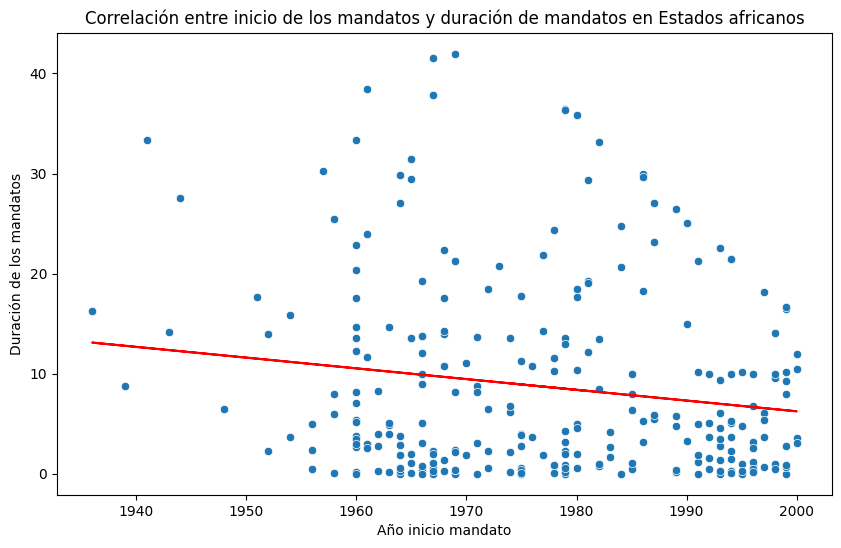

In [308]:
#RELACIÓN ENTRE AÑO ENTRADA Y DURACIÓN DE LOS MANDATOS
x = df_lideres_africanos_descol['startyear']
y = df_lideres_africanos_descol['term_lenght'] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)

m, b = np.polyfit(x, y, 1)  
plt.plot(x, m*x + b, color='red')  
plt.xlabel('Año inicio mandato')
plt.ylabel('Duración de los mandatos')
plt.title('Correlación entre inicio de los mandatos y duración de mandatos en Estados africanos')
plt.show()

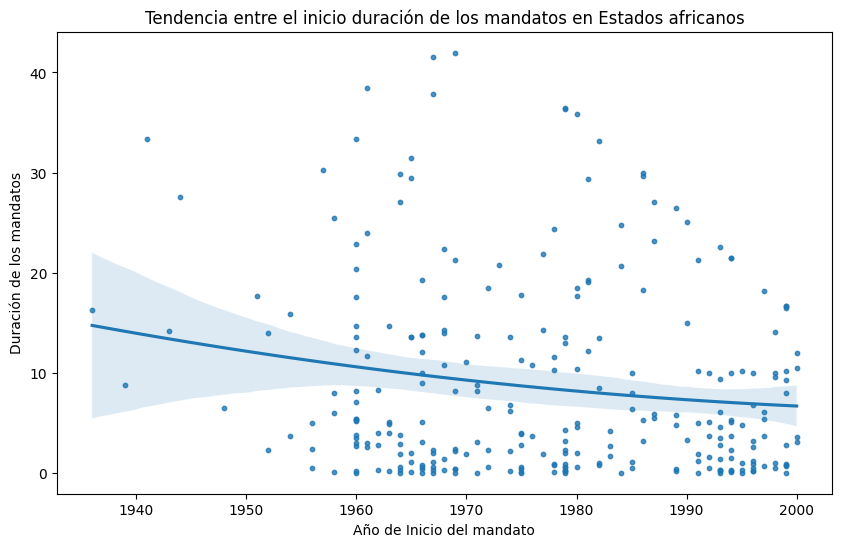

In [309]:
plt.figure(figsize=(10, 6))
sns.regplot(x='startyear', y='term_lenght', data=df_lideres_africanos_descol, order=2, scatter_kws={'s':10})

plt.xlabel('Año de Inicio del mandato')
plt.ylabel('Duración de los mandatos')
plt.title('Tendencia entre el inicio duración de los mandatos en Estados africanos')

plt.show()

## PIB

In [337]:
try:
    df_PIB = pd.read_csv('PIBMUNDIAL.csv', encoding='ISO-8859-1', sep=',"')
except UnicodeDecodeError:
    try:
        df_PIB = pd.read_csv('PIBMUNDIAL.csv', encoding='cp1252', sep=',"')
    except UnicodeDecodeError:
        print("Error de codificación no resuelto")

df_PIB.columns = [col.replace('"', '') for col in df_PIB.columns]
df_PIB = df_PIB.replace('"', '', regex=True)
df_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,,,,,,,,,,,,,,,,,16.0784313725487,18.6486486486489,12.1298405466969,3.96140172676478,7.96287174444331,5.88235395341866,7.30769324531406,8.20390129312089,2.54714368704694,1.18578851134656,7.04687499241221,1.99198444906199,1.2380418420716,7.62292063918883,4.18200264137074,-0.944954680852376,1.11050500975789,7.29372893965754,-0.383139603849997,1.12741212792535,3.08954390149292,1.83575567874084,-11.6777420291428,-2.73345570739019,3.36923812209224,-1.04080013542467,6.43148182354385,-1.58657464362111,-0.623625632862655,1.7196241156332,7.04853325902029,2.38173012558298,-2.30283684401374,-23.982580345495,27.6393569688502,10.45831735343,NaN
1,Afganistn,AFG,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,8.8322778126357,1.41411798058977,11.2297148236429,5.35740325126363,13.8263195479762,3.92498382161577,21.3905283931067,14.3624414692682,0.426354784529352,12.7522870887165,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,,NaN
2,Angola,AGO,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,,,,,,,,,,,-4.40000121865044,0,4.20000142853745,6.00000216509061,3.49999949008624,2.90000174246859,4.08274863510718,6.12889047765088,0.0416214618374653,-3.45009868500253,0.991359302044742,-5.83828073313141,-23.9834174420578,1.33936343647991,15.0000000288634,13.5443697551026,7.27427735460373,4.69114645093552,2.18148971840458,3.05462423430785,4.2059985561951,13.6656887608562,2.99000000000001,10.9500000059465,15.0299999905513,11.549999997879,14.0100000086059,11.1699999942146,0.860000002152788,4.39837593810763,3.47205314798103,8.54210707584141,4.95461303112738,4.82255926962156,0.943571561325001,-2.5801112218828,-0.147149825449205,-1.31636168896895,-0.702272957616017,-5.63821471714934,1.19921052145153,3.04540300954928,NaN
3,Albania,ALB,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,,,,,,,,,,,5.74563529228122,2.94859680118948,1.10493826195044,-1.25159664405811,1.78064395924903,5.63724317852112,-0.787842654927246,-1.42003965566391,9.83654897187228,-9.57564016993415,-28.0021416559099,-7.18711091500037,9.5594116849315,8.30286659699671,13.322333321684,9.09999943646361,-10.9199840781391,8.82942375839806,12.8908036407763,6.94621659244254,8.29331263121023,4.53652416035675,5.52863746491788,5.51466791097914,5.52642424695465,5.90265903591924,5.98325951855567,7.50004143020151,3.35428934987461,3.70693815255319,2.54540614450104,1.4172427999078,1.00201754071108,1.77444885260394,2.21872637517804,3.31498068384137,3.80259872019053,4.01934561695576,2.08771199649604,-3.30208203862541,8.90852781831182,4.85640165227306,NaN
4,Andorra,AND,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,4.64946536113831,8.14974348780973,7.78846720332223,5.6187897289272,0.54220565931233,3.30378704601691,2.83857556823506,1.46300017891366,0.0415571952087532,2.20872761127492,-0.132474510851083,1.24646111073419,1.77011831683124,1.78468668995906,2.32143303367481,3.2533217762911,5.54712217080133,5.0943262031371,4.82703425038704,3.78138758571333,2.54600352375863,0.929214040125956,-1.03148438999895,2.3831822482118,2.75750161326249,4.64973866754707,9.06767205144135,3.19479339289236,4.0990789217793,3.52836236122388,8.11935772169949,4.54636221364653,8.69420371612468,8.13567633837351,5.39779598500422,4.80868869916921,1.55318814103222,-5.55918636850581,-5.30284654348291,-1.97495799965345,-0.00806975341139093,-4.97444371853503,-3.54759651549344,2.50446552114518,1.43414039522716,3.70967806978986,

In [312]:
df_PIB["Country Code"].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE',
       'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA',
       'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU',
       'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI',
       'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IMN', 'IND',
       'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT',
       'LAC', 'LAO',

In [313]:
paises_africanos2 = [
    'AGO', 'BEN', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 
    'COG', 'COD', 'DJI', 'EGY', 'GNQ', 'ERI', 'ETH', 'GAB', 'GMB', 
    'GHA', 'GIN', 'GNB', 'CIV', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 
    'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 
    'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 
    'SWZ', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE'
]

In [314]:
df_PIB_africa = df_PIB[df_PIB['Country Code'].isin(paises_africanos2)]
df_PIB_africa

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
2,Angola,AGO,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,,,,,,,,,,,,,,,,,,,,,-4.40000121865044,0,4.20000142853745,6.00000216509061,3.49999949008624,2.90000174246859,4.08274863510718,6.12889047765088,0.0416214618374653,-3.45009868500253,0.991359302044742,-5.83828073313141,-23.9834174420578,1.33936343647991,15.0000000288634,13.5443697551026,7.27427735460373,4.69114645093552,2.18148971840458,3.05462423430785,4.2059985561951,13.6656887608562,2.99000000000001,10.9500000059465,15.0299999905513,11.549999997879,14.0100000086059,11.1699999942146,0.860000002152788,4.39837593810763,3.47205314798103,8.54210707584141,4.95461303112738,4.82255926962156,0.943571561325001,-2.5801112218828,-0.147149825449205,-1.31636168896895,-0.702272957616017,-5.63821471714934,1.19921052145153,3.04540300954928,NaN
14,Burundi,BDI,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,-13.7461350539839,9.06315793386563,4.13540742185575,6.27303790087062,3.96722560928015,4.61299289557684,13.8215186020874,-0.297883673472171,-1.45954114245622,21.3256707328654,2.74682871213831,-6.40396492407875,6.88905071896333,-0.726839562746335,0.697920236215197,7.9426609761414,11.4694530439125,-0.940575988409648,1.66495495023543,0.991055725106477,12.1632755698283,-1.05359982021012,3.71532699139112,0.155544004959737,11.7831801786654,3.25018045970241,5.50309611952244,5.03102436749121,1.34950223651784,3.49982213611253,4.99683644792125,1.00999837099629,-6.24000000139047,-3.82999999619828,-7.92000000374772,-7.99999999794093,-1.58999999685828,4.74999999509613,-1.00999999649815,-0.856864058424151,2.05580710835243,4.44651941224797,-1.22372796023444,4.83365776809453,0.900000000901912,5.41380714491444,3.45194856381943,4.86171636712641,3.81274536633418,5.12415999439806,4.03259998844415,4.44670633111495,4.92418989834684,4.24065021402657,-3.9000000804855,-0.600000909116389,0.500001262429279,1.60993542127714,1.81256532326668,0.327156891263598,3.09999999999975,1.84899944017253,NaN
16,Benin,BEN,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,3.14128045641213,-3.42640982098587,4.7300279709188,6.65075912824808,5.29386282871174,3.57586273248711,1.07839866664565,3.84233563459493,2.87749797403703,2.09775758051059,-1.4968418264467,6.4263675448305,3.70616531907105,3.33931215742955,-4.89534544658655,0.884356332845641,4.98366372995041,1.25507802775073,6.53574741502341,6.78176386785228,9.95423116708119,2.23506634402393,-4.34782273516674,7.92983956551727,7.53032483806271,2.17114159792595,-1.50000295231442,3.40524529583226,-2.85416049622336,8.9761343599898,4.22579942071668,2.95771082720395,5.83617208501383,2.02040044761662,6.04519865041564,4.32428403131786,5.73468837521307,3.96101213832645,5.34144937204417,5.85771420543269,5.33313570603937,4.64303087074482,3.44357677591658,4.42968455385082,1.71316456361184,3.94373882815798,5.98634932177609,4.89657708429647,2.31929213912838,2.11406472648392,2.96375291904201,4.811223315688,7.19143372144946,6.35767909791932,1.77815106030278,3.33967342629693,5.67156195150444,6.69725362180888,6.86568662848335,3.84879240030133,7.1554516457574,6.25324491401346,NaN
17,Burkina Faso,BFA,Crecimiento del PIB (% anual),NY.GDP.MKTP.KD.ZG,,4.04392797754925,6.12879878024506,-1.26801637269189,2.28281922375837,3.76454538063129,0.537613083660716,8.82331497485367,3.07077393782897,2.02608104052698,0.117019610679606,1.4133398815319,2.31149874156277,0.449327404480641,8.28642648036377,2.99838289707345,8.53489496068103,0.370353563662789,4.60782499965684,3.66462151207865,0.796878878579221,4.25530339455582,9.56219662181179,0.345984740208507,-1.77869668772937,8.51736499112322,7.9553627287484,-0.236336789143323,5.795592964580

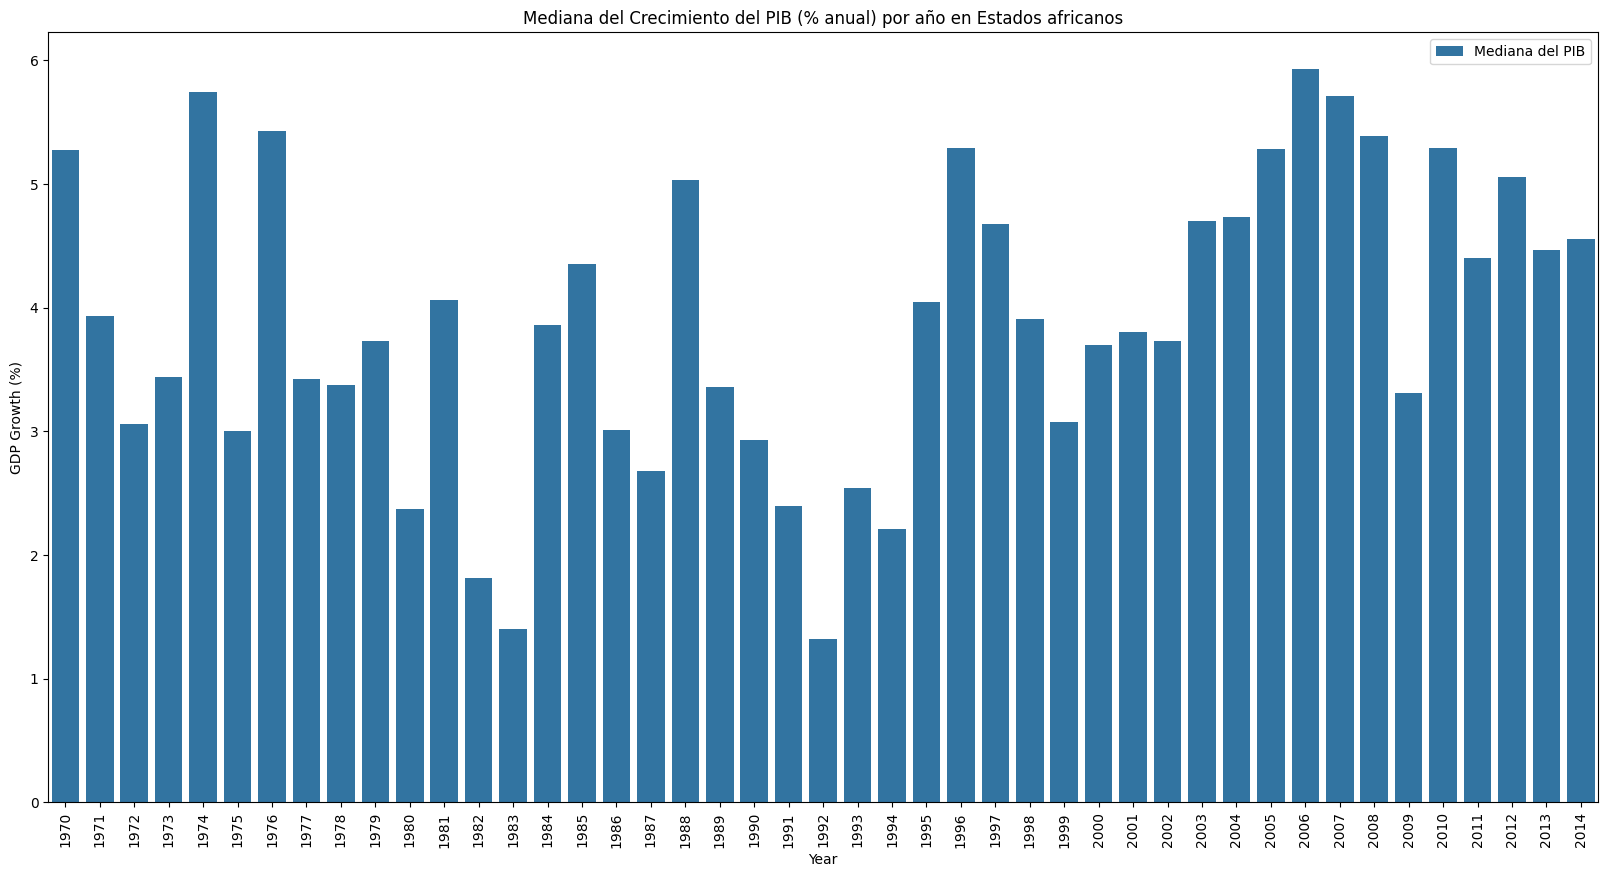

In [338]:
df_long = pd.melt(df_PIB_africa, id_vars=['Country Name', 'Country Code'], value_vars=years, var_name='Year', value_name='GDP Growth (%)')
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['GDP Growth (%)'] = pd.to_numeric(df_long['GDP Growth (%)'], errors='coerce')
df_long_filtered = df_long.dropna(subset=['GDP Growth (%)'])
df_yearly_median = df_long_filtered.groupby('Year')['GDP Growth (%)'].median().reset_index()

plt.figure(figsize=(20, 10))
ax = plt.gca()  
sns.barplot(data=df_yearly_median, x='Year', y='GDP Growth (%)', ax=ax, label='Mediana del PIB')

plt.title("Mediana del Crecimiento del PIB (% anual) por año en Estados africanos")
plt.xticks(rotation=90)
plt.legend()
plt.show()    

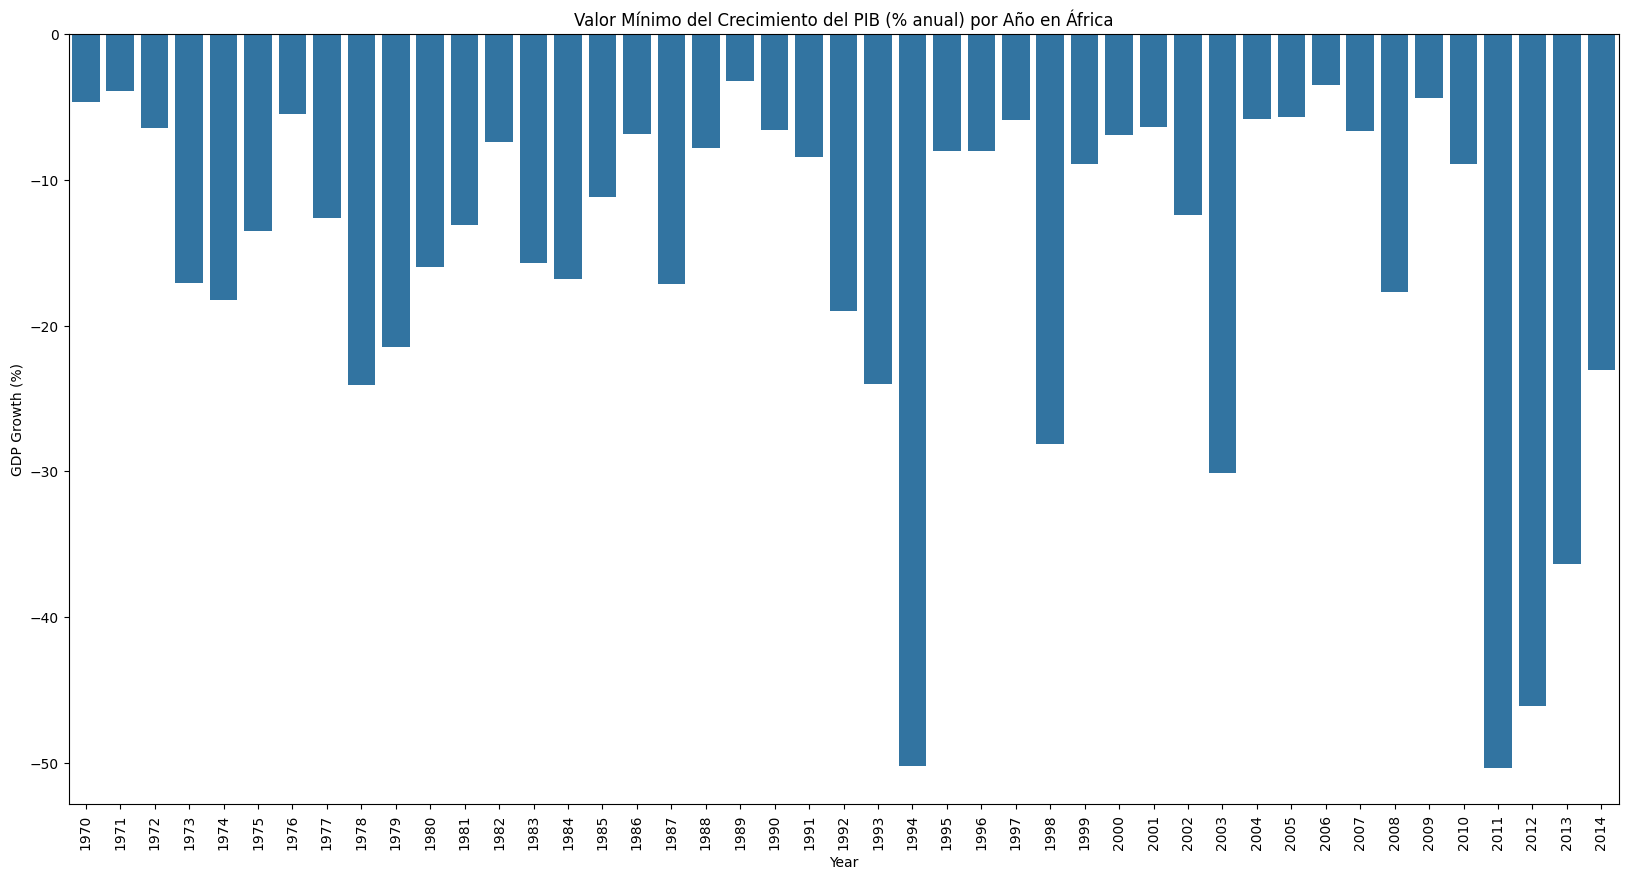

In [339]:
df_long = pd.melt(df_PIB_africa, id_vars=['Country Name', 'Country Code'], value_vars=years, var_name='Year', value_name='GDP Growth (%)')
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['GDP Growth (%)'] = pd.to_numeric(df_long['GDP Growth (%)'], errors='coerce')
df_long_filtered = df_long.dropna(subset=['GDP Growth (%)'])

df_yearly_min = df_long_filtered.groupby('Year')['GDP Growth (%)'].min().reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(data=df_yearly_min, x='Year', y='GDP Growth (%)')
plt.title("Valor Mínimo del Crecimiento del PIB (% anual) por Año en África")
plt.xticks(rotation=90)
plt.show()

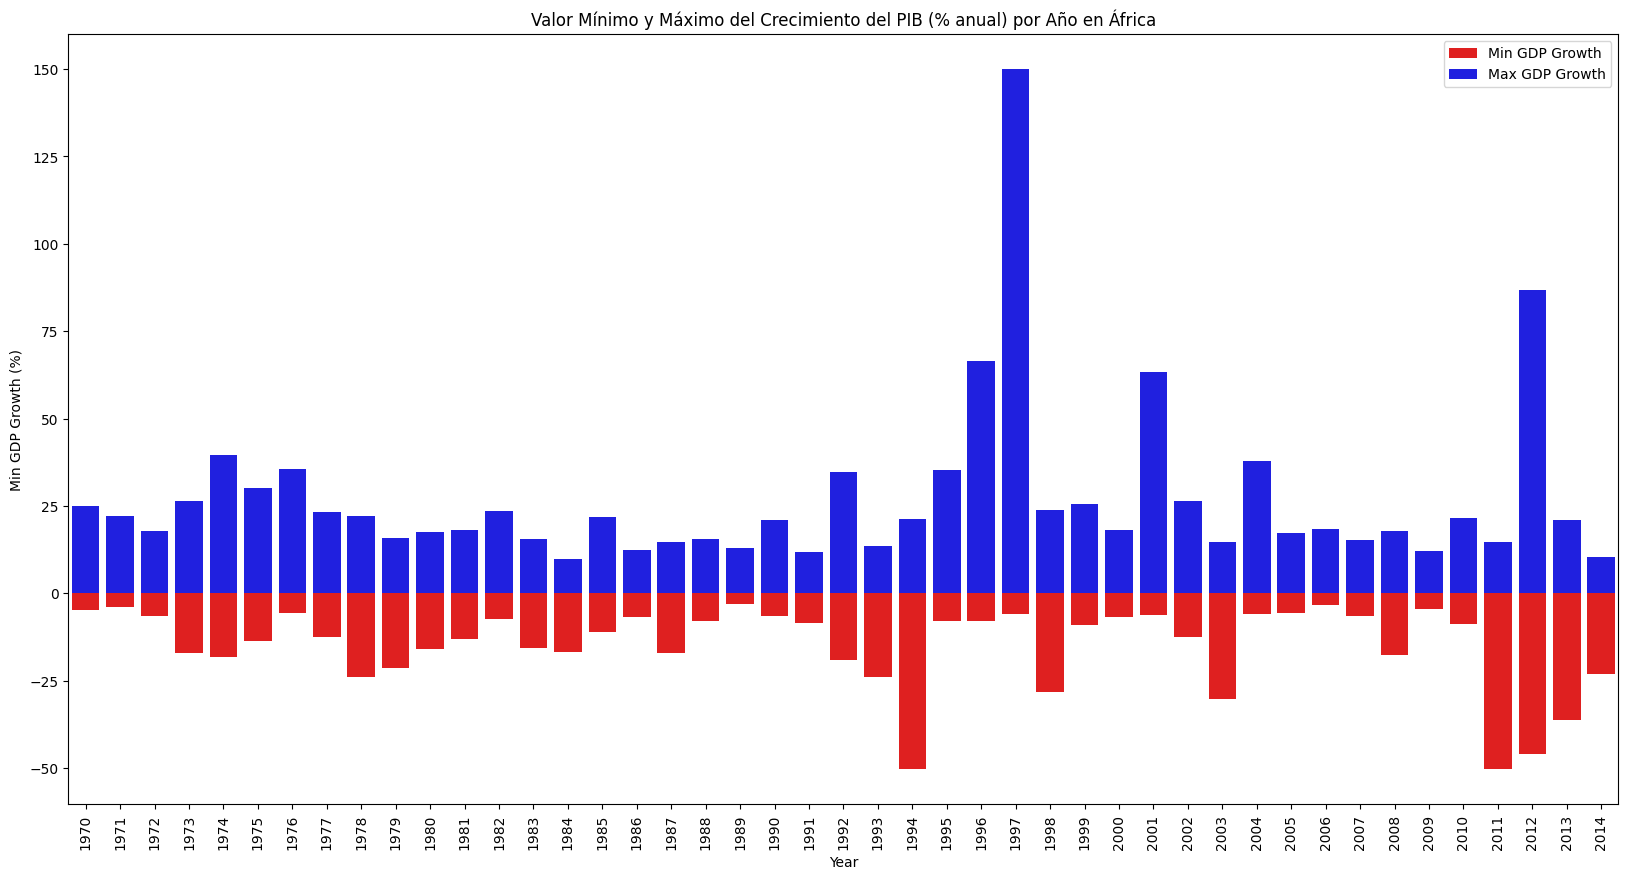

In [317]:
df_long = pd.melt(df_PIB_africa, id_vars=['Country Name', 'Country Code'], value_vars=years, var_name='Year', value_name='GDP Growth (%)')
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['GDP Growth (%)'] = pd.to_numeric(df_long['GDP Growth (%)'], errors='coerce')
df_long_filtered = df_long.dropna(subset=['GDP Growth (%)'])

df_yearly_min = df_long_filtered.groupby('Year')['GDP Growth (%)'].min().reset_index()
df_yearly_max = df_long_filtered.groupby('Year')['GDP Growth (%)'].max().reset_index()

df_yearly_min.rename(columns={'GDP Growth (%)': 'Min GDP Growth (%)'}, inplace=True)
df_yearly_max.rename(columns={'GDP Growth (%)': 'Max GDP Growth (%)'}, inplace=True)
df_yearly_combined = pd.merge(df_yearly_min, df_yearly_max, on='Year')

plt.figure(figsize=(20, 10))
sns.barplot(data=df_yearly_combined, x='Year', y='Min GDP Growth (%)', color='red', label='Min GDP Growth')
sns.barplot(data=df_yearly_combined, x='Year', y='Max GDP Growth (%)', color='blue', label='Max GDP Growth')

plt.title("Valor Mínimo y Máximo del Crecimiento del PIB (% anual) por Año en África")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# RDC (Rep.Dem.Congo)

In [318]:
df_lideres[df_lideres['idacr'] == 'DRC']


,obsid,leadid,ccode,idacr,leader,startdate,enddate,entry,exit,exitcode,prevtimesinoffice,posttenurefate,gender,yrborn,yrdied,borndate,deathdate,dbpediauri,fties,ftcur,term_lenght,term_interval,startyear
2461,DRC-1960-1,8231d491-1e42-11e4-b4cd-db5882bf8def,490,DRC,Lumumba,1960-06-30,1960-09-14,Regular,Irregular,"Removed by Military, without Foreign Support",0,Death,M,1925,1961,1925-07-02,1961-01-17,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.208077,"[1960-06-30, 1960-09-14]",1960
2462,DRC-1960-2,8231d492-1e42-11e4-b4cd-db5882bf8def,490,DRC,Mobutu,1960-09-14,1960-09-20,Irregular,Regular,Regular,0,OK,M,1930,-777,1930-10-14,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,0.016427,"[1960-09-14, 1960-09-20]",1960
2463,DRC-1960-3,8231d493-1e42-11e4-b4cd-db5882bf8def,490,DRC,Kasavubu,1960-09-20,1965-11-25,Regular,Irregular,"Removed by Military, without Foreign Support",0,OK,M,1913,1969,NA,NA,NA,NA,NA,5.180014,"[1960-09-20, 1965-11-25]",1960
2464,DRC-1965,8231d492-1e42-11e4-b4cd-db5882bf8def,490,DRC,Mobutu,1965-11-25,1997-05-16,Irregular,Irregular,"Removed by Rebels, without Foreign Support",1,Exile,M,1930,-777,1930-10-14,NA,https://urldefense.proofpoint.com/v2/url?u=htt...,NA,NA,31.471595,"[1965-11-25, 1997-05-16]",1965
2465,DRC-1997,8231d494-1e42-11e4-b4cd-db5882bf8def,490,DRC,Laurent Kabila,1997-05-16,2001-01-16,Irregular,Irregular,"Removed by Military, without Foreign Support",0,Death,M,1939,2001,1939-11-27,2001-01-16,https://urldefense.proofpoint.com/v2/url?u=htt...,Father of Joseph Kabila%82320564-1e42-11e4-b4c...,0,3.671458,"[1997-05-16, 2001-01-16]",1997
2466,DRC-2001,82320564-1e42-11e4-b4cd-db5882bf8def,490,DRC,Joseph Kabila,2001-01-17,2015-12-31,Regular,Still in Office,Still in Office,0,Leader Still in Office,M,1971,-777,1971-06-04,NA,NA,Son of Laurent Kabila%8231d494-1e42-11e4-b4cd-...,1,14.951403,"[2001-01-17, 2015-12-31]",2001


# RECUENTOS

In [319]:
df_lideres["entry"].unique()

array(['Regular', 'Irregular', 'Foreign Imposition', 'Unknown'],
      dtype=object)

In [320]:
df_lideres["exit"].unique()

array(['Regular', 'Irregular', 'Natural Death', 'Still in Office',
       'Retired Due to Ill Health', 'Foreign', 'Suicide', 'Unknown'],
      dtype=object)

In [321]:
df_lideres["exitcode"].unique()

array(['Regular', 'Assassination by Unsupported Individual',
       'Still in Office', 'Unknown',
       'Removed by Military, without Foreign Support',
       'Removed in Military Power Struggle Short of Coup',
       'Removed by Rebels, without Foreign Support',
       'Popular Protest, without Foreign Support',
       'Removed through Threat of Foreign Force',
       'Removed by Rebels, with Foreign Support',
       'Removed by Military, with Foreign Support',
       'Popular Protest, with Foreign Support',
       'Removed by Other Government Actors, without Foreign Support',
       'Removed by Other Government Actors, with Foreign Support',
       'Irregular, Other'], dtype=object)